In [1]:
import urllib.request
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline
import pywt

In [2]:
def show(img):
    plt.figure(figsize = (30,30))
    plt.imshow(img, cmap="gray")

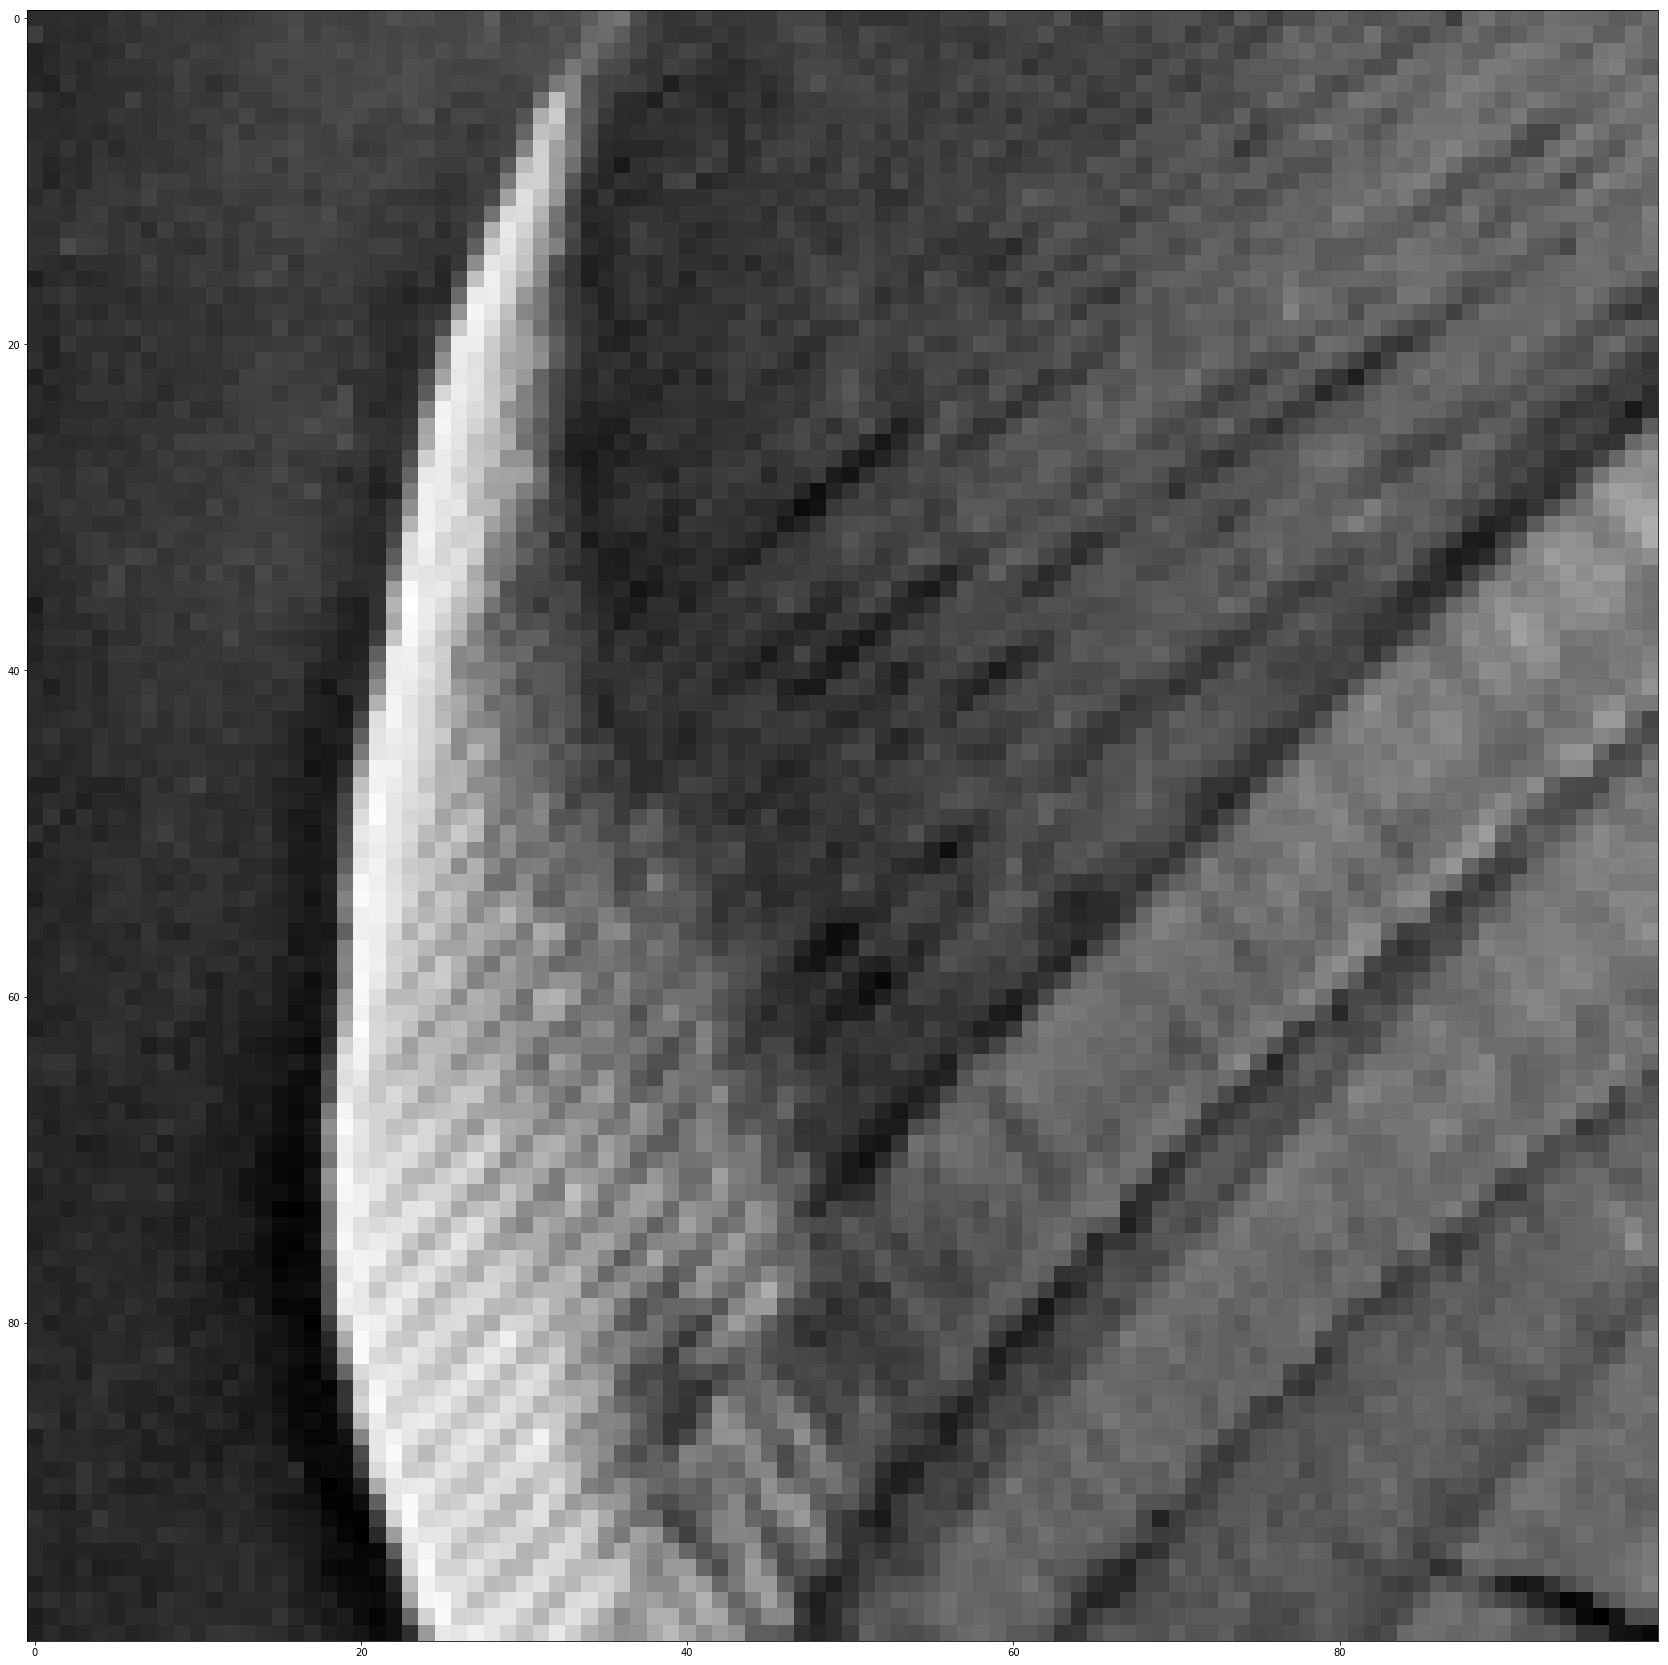

In [4]:
HTTP_response = urllib.request.urlopen('http://www.hpca.ual.es/~vruiz/images/lena.png')
arr = np.asarray(bytearray(HTTP_response.read()), dtype=np.uint8)
BGR = cv2.imdecode(arr,-1)
Y = cv2.cvtColor(BGR, cv2.COLOR_BGR2YCrCb)[:,:,0]
Y = Y.astype(np.float32)
show(Y[100:200,100:200])

In [5]:
# Calculamos la DWT de la imagen original
#wavelet = 'rbio1.1'
#wavelet = 'rbio3.5'
wavelet = 'db5'
#wavelet = 'db25'
#wavelet = 'rbio6.8'

In [6]:
zero = np.zeros(Y.shape)

In [ ]:
iY = pywt.idwt2((Y, (zero, zero, zero)), wavelet, 'per')

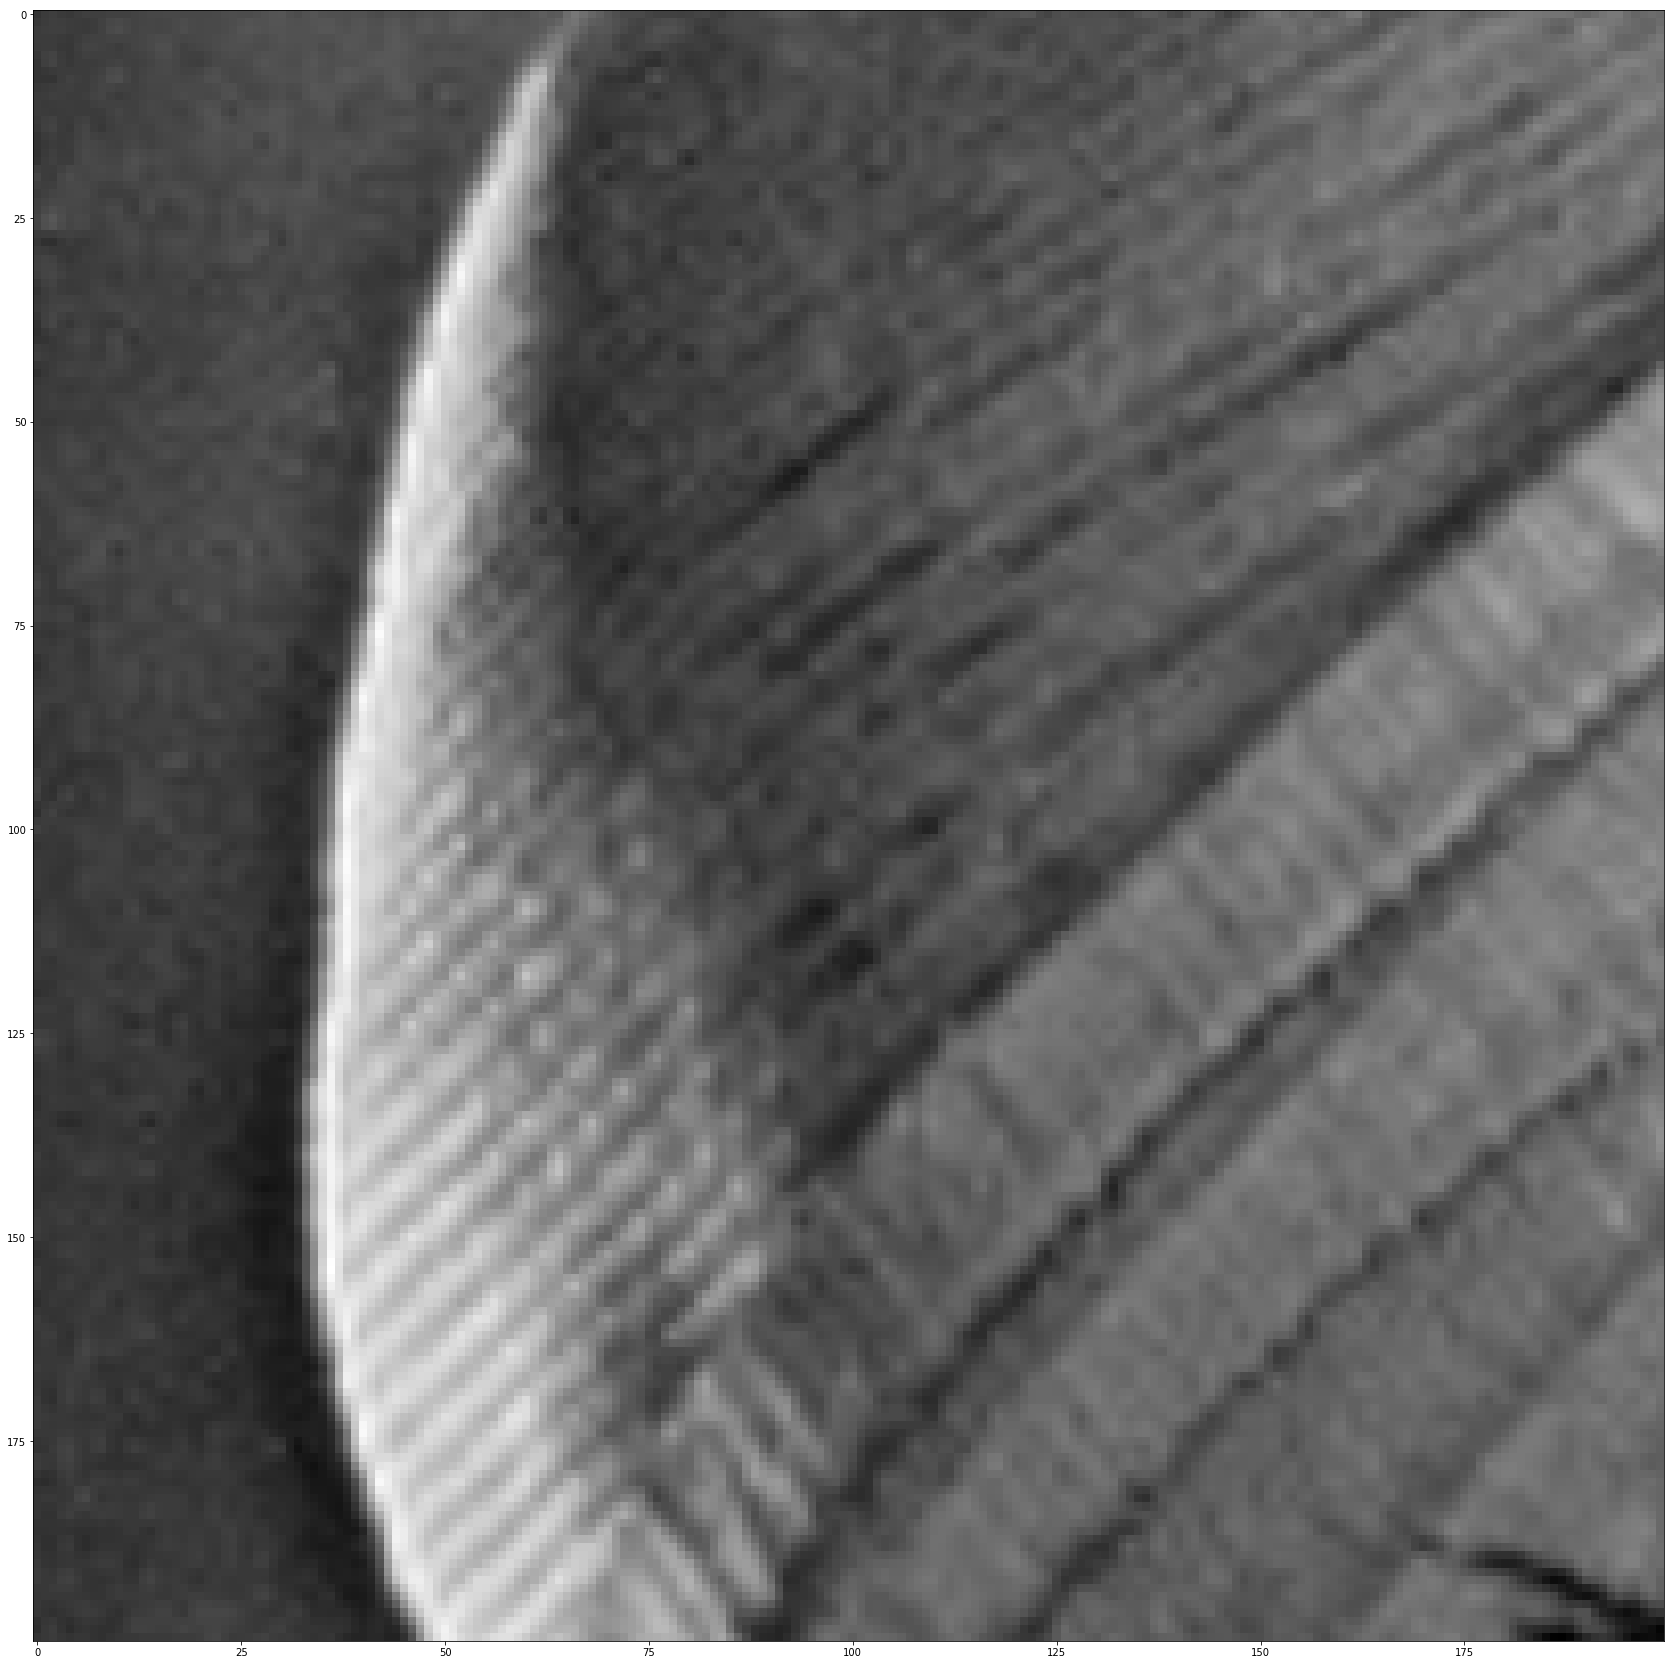

In [13]:
show(iY[200:400,200:400])

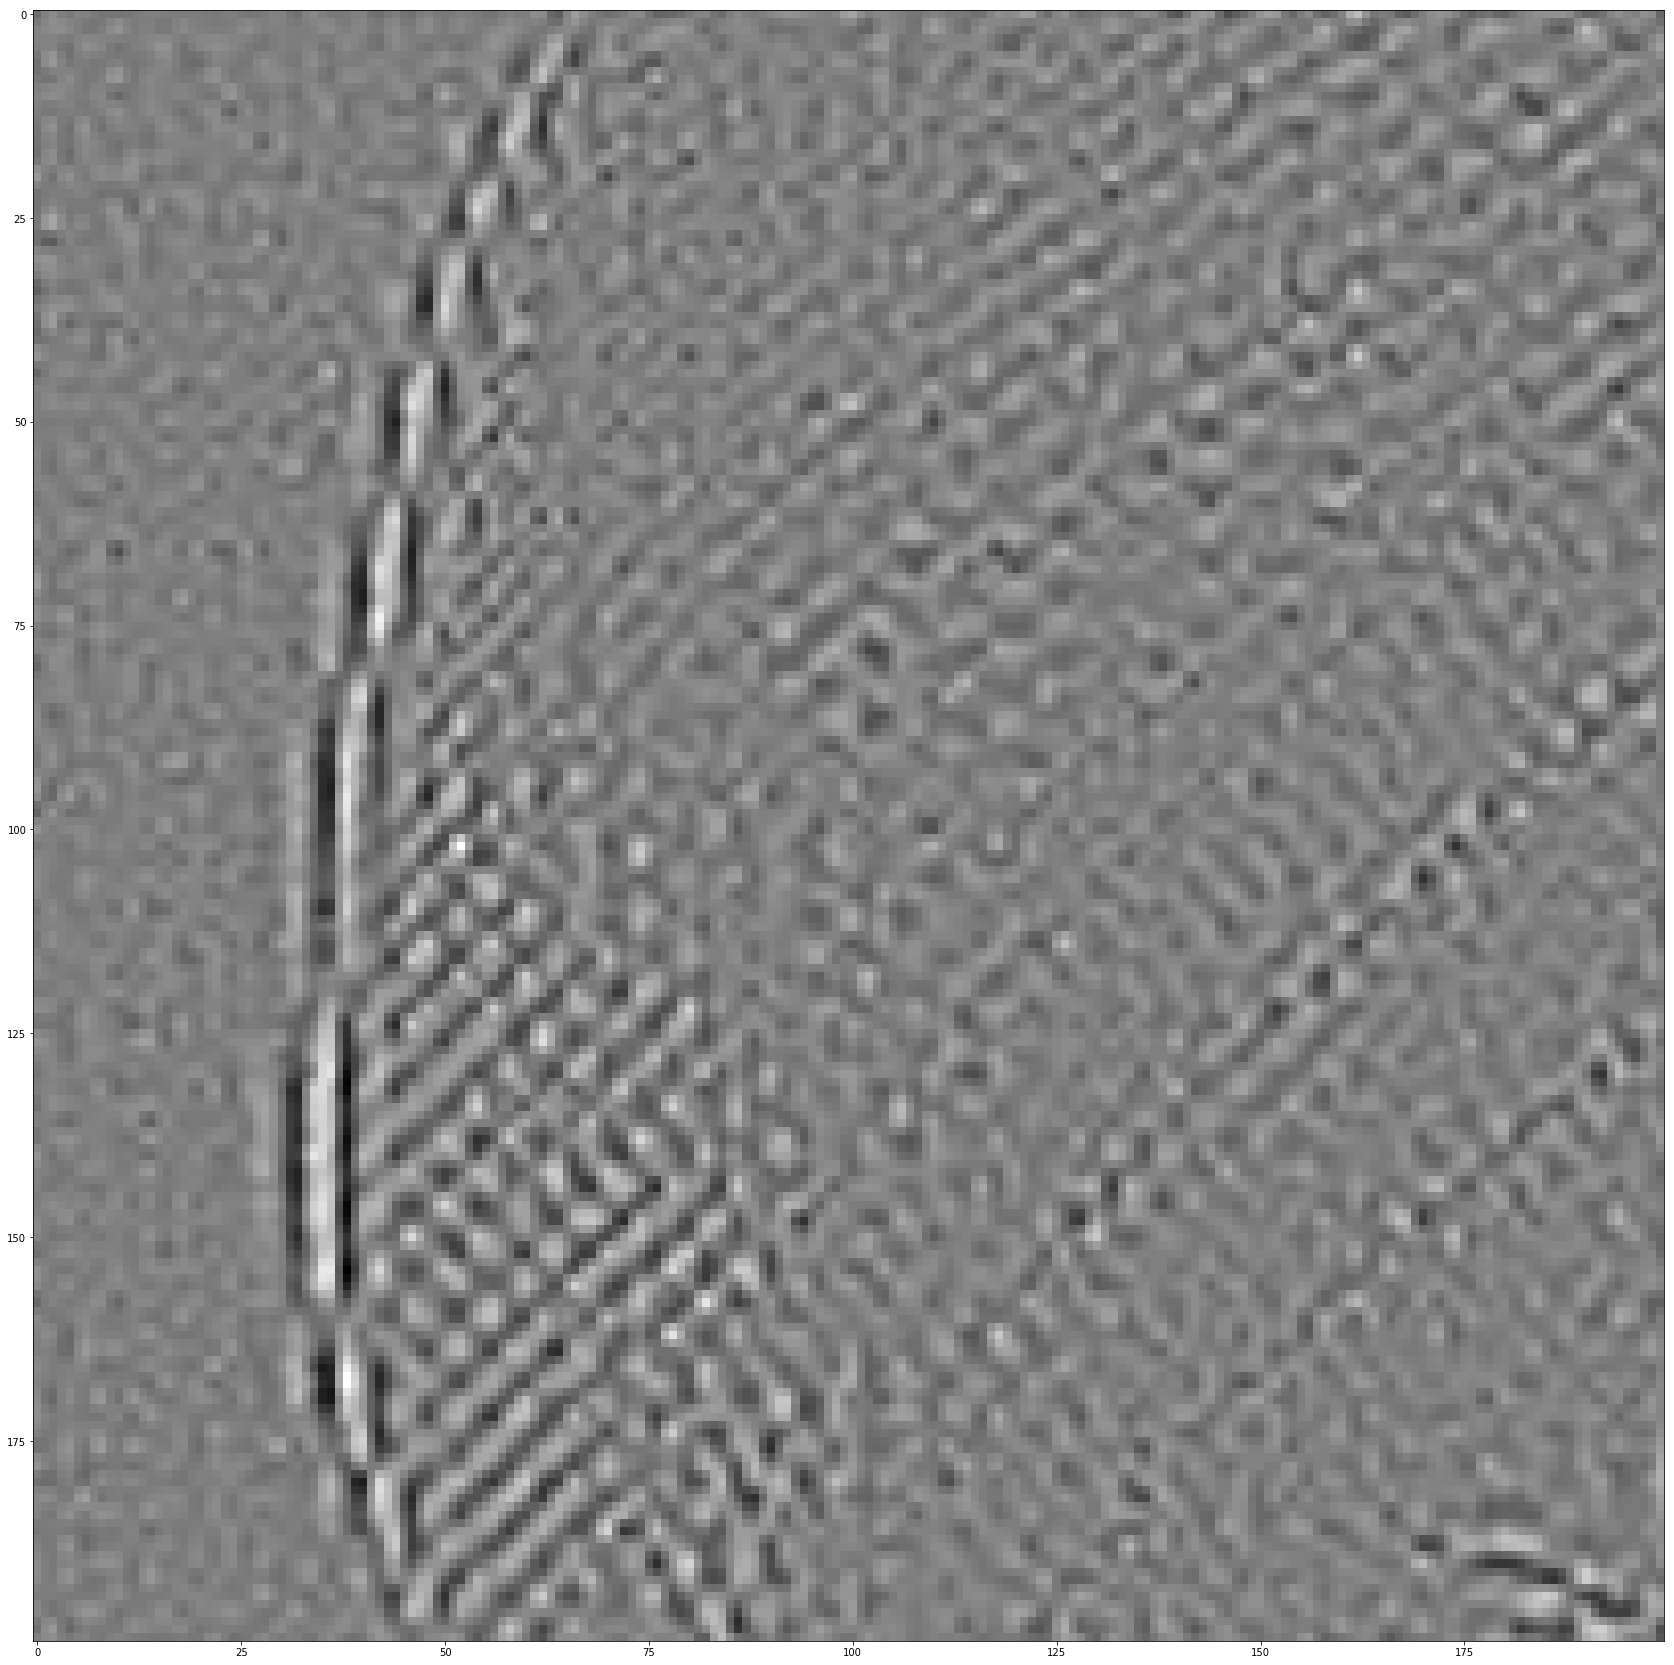

In [23]:
L, H = pywt.dwt2(Y, wavelet, 'per')
zero = np.zeros(L.shape)
_H_ = pywt.idwt2((zero, H), wavelet, 'per')
zero = np.zeros(Y.shape)
i_H_ = pywt.idwt2((_H_, (zero, zero, zero)), wavelet, 'per')
show(i_H_[200:400,200:400])

[[-1.03784311  1.81750835 -1.15345056 ... -0.85506787  0.52558011
  -1.25684324]
 [ 0.49935049  0.13800076  0.31548281 ... -1.1422706   1.38249105
  -0.72545172]
 [ 0.32419358  1.47928018 -1.12538889 ... -0.85315948 -0.07956557
   0.06967993]
 ...
 [-0.41047003  0.6974565   0.49760681 ...  1.02543078  1.09160666
  -2.4588848 ]
 [-1.1549775   0.11127829 -1.06835183 ...  0.75937449  0.80719
   0.66151079]
 [-0.60493    -0.20413964 -0.33344494 ... -0.39510975 -0.91432863
   1.79797438]]


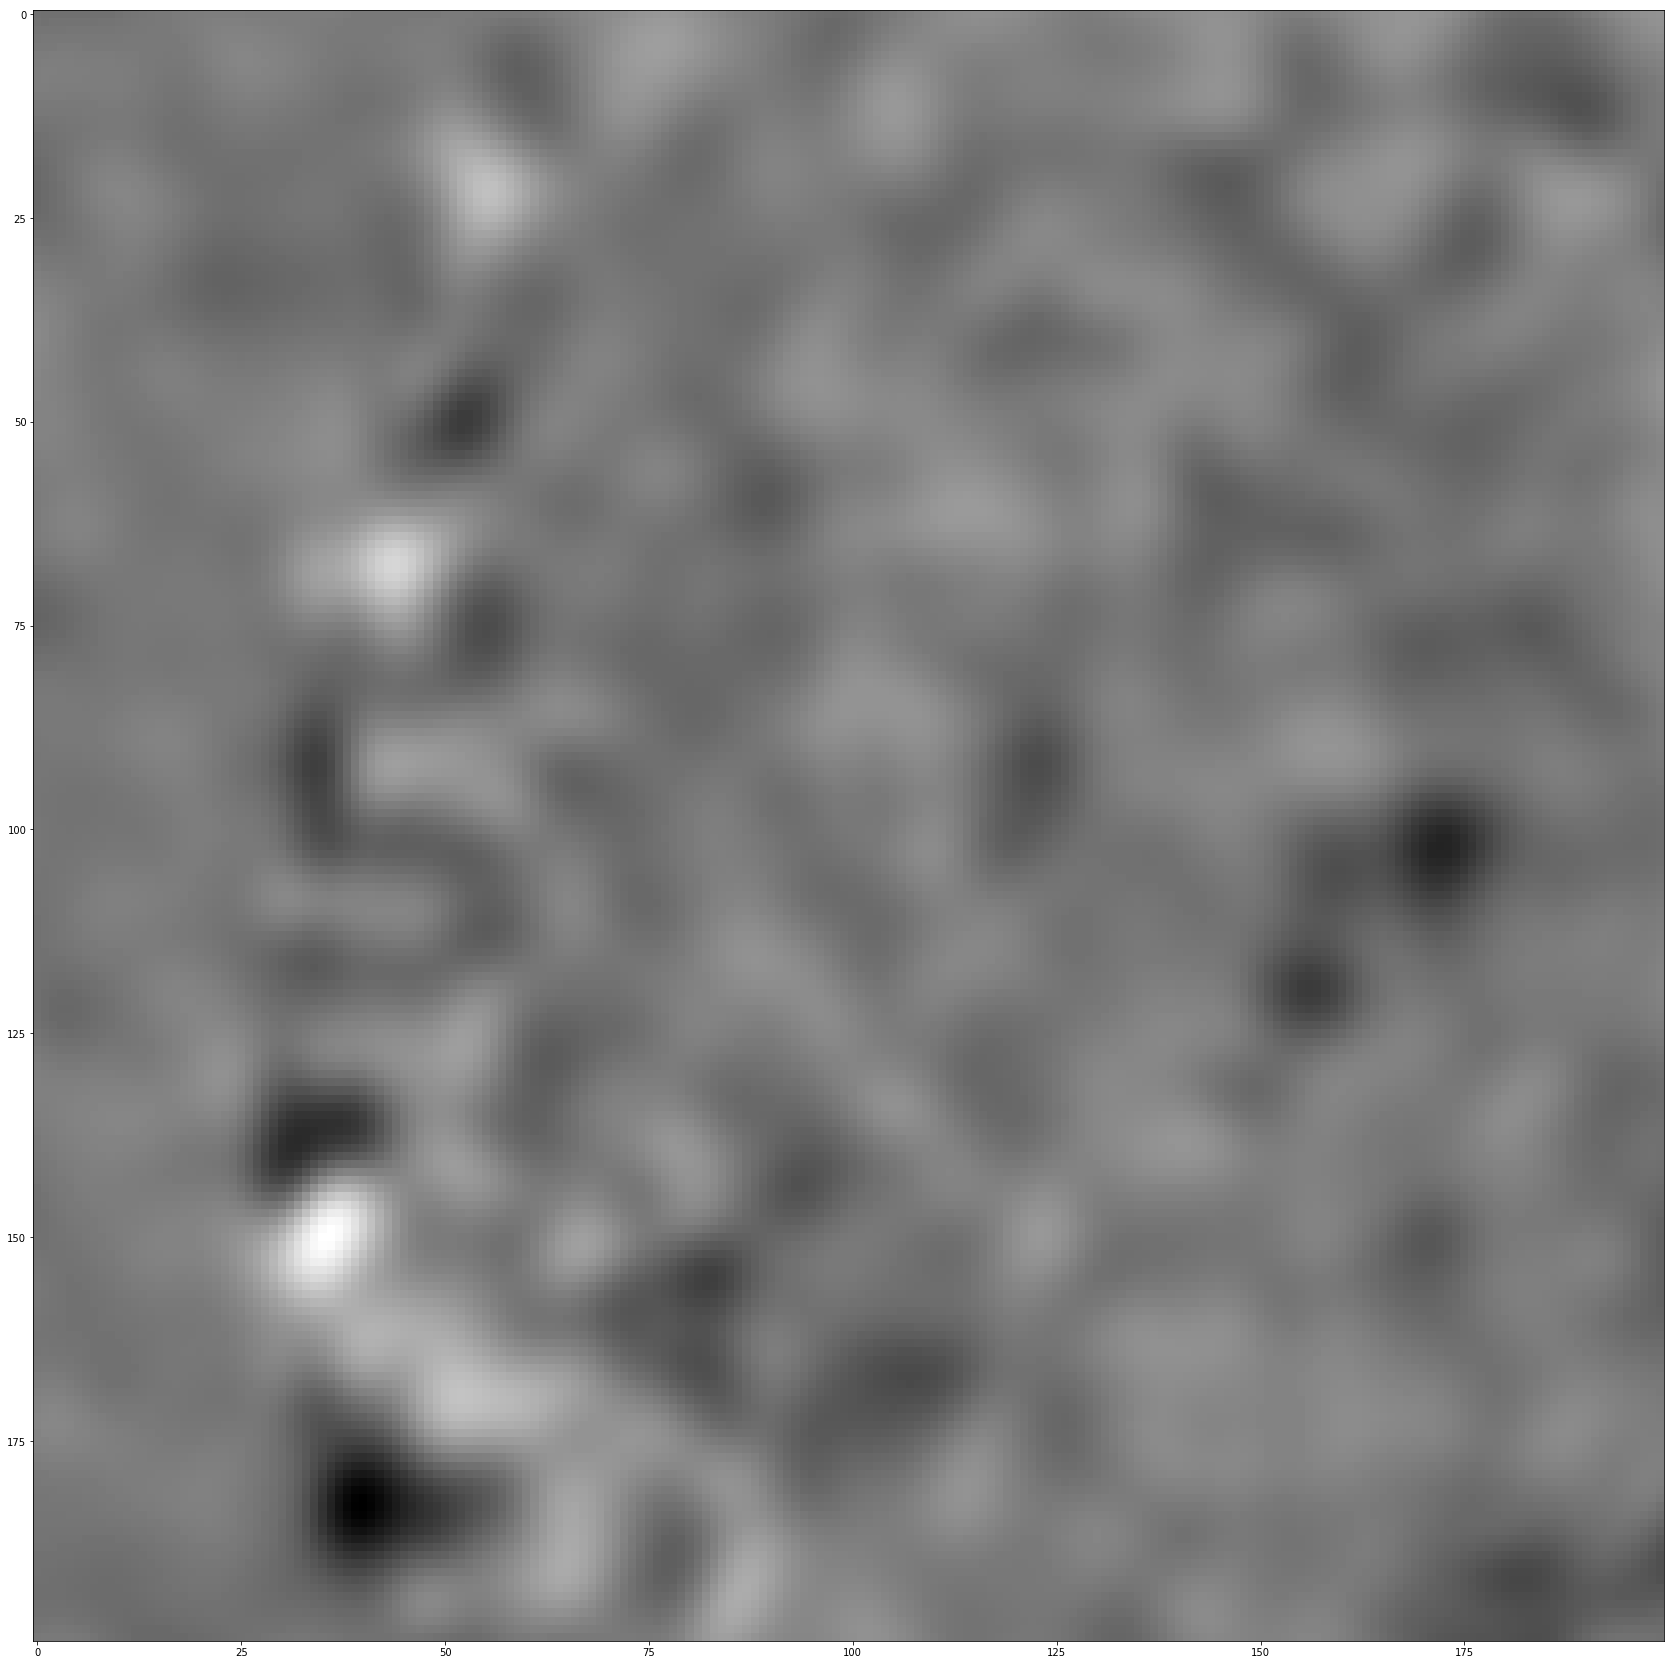

In [53]:
from medpy.filter.smoothing import anisotropic_diffusion
noise = np.random.normal(0.0, 1, i_H_.shape)
print(noise)
i_H_noise = i_H_ +  noise * i_H_
#i_H_filtered = anisotropic_diffusion(i_H_noise, niter=10)
#i_H_filtered = anisotropic_diffusion(i_H_, niter=100)
i_H_filtered = anisotropic_diffusion(i_H_noise, niter=100, kappa=500, gamma=0.1, voxelspacing=None, option=1)
show(i_H_filtered[200:400,200:400])

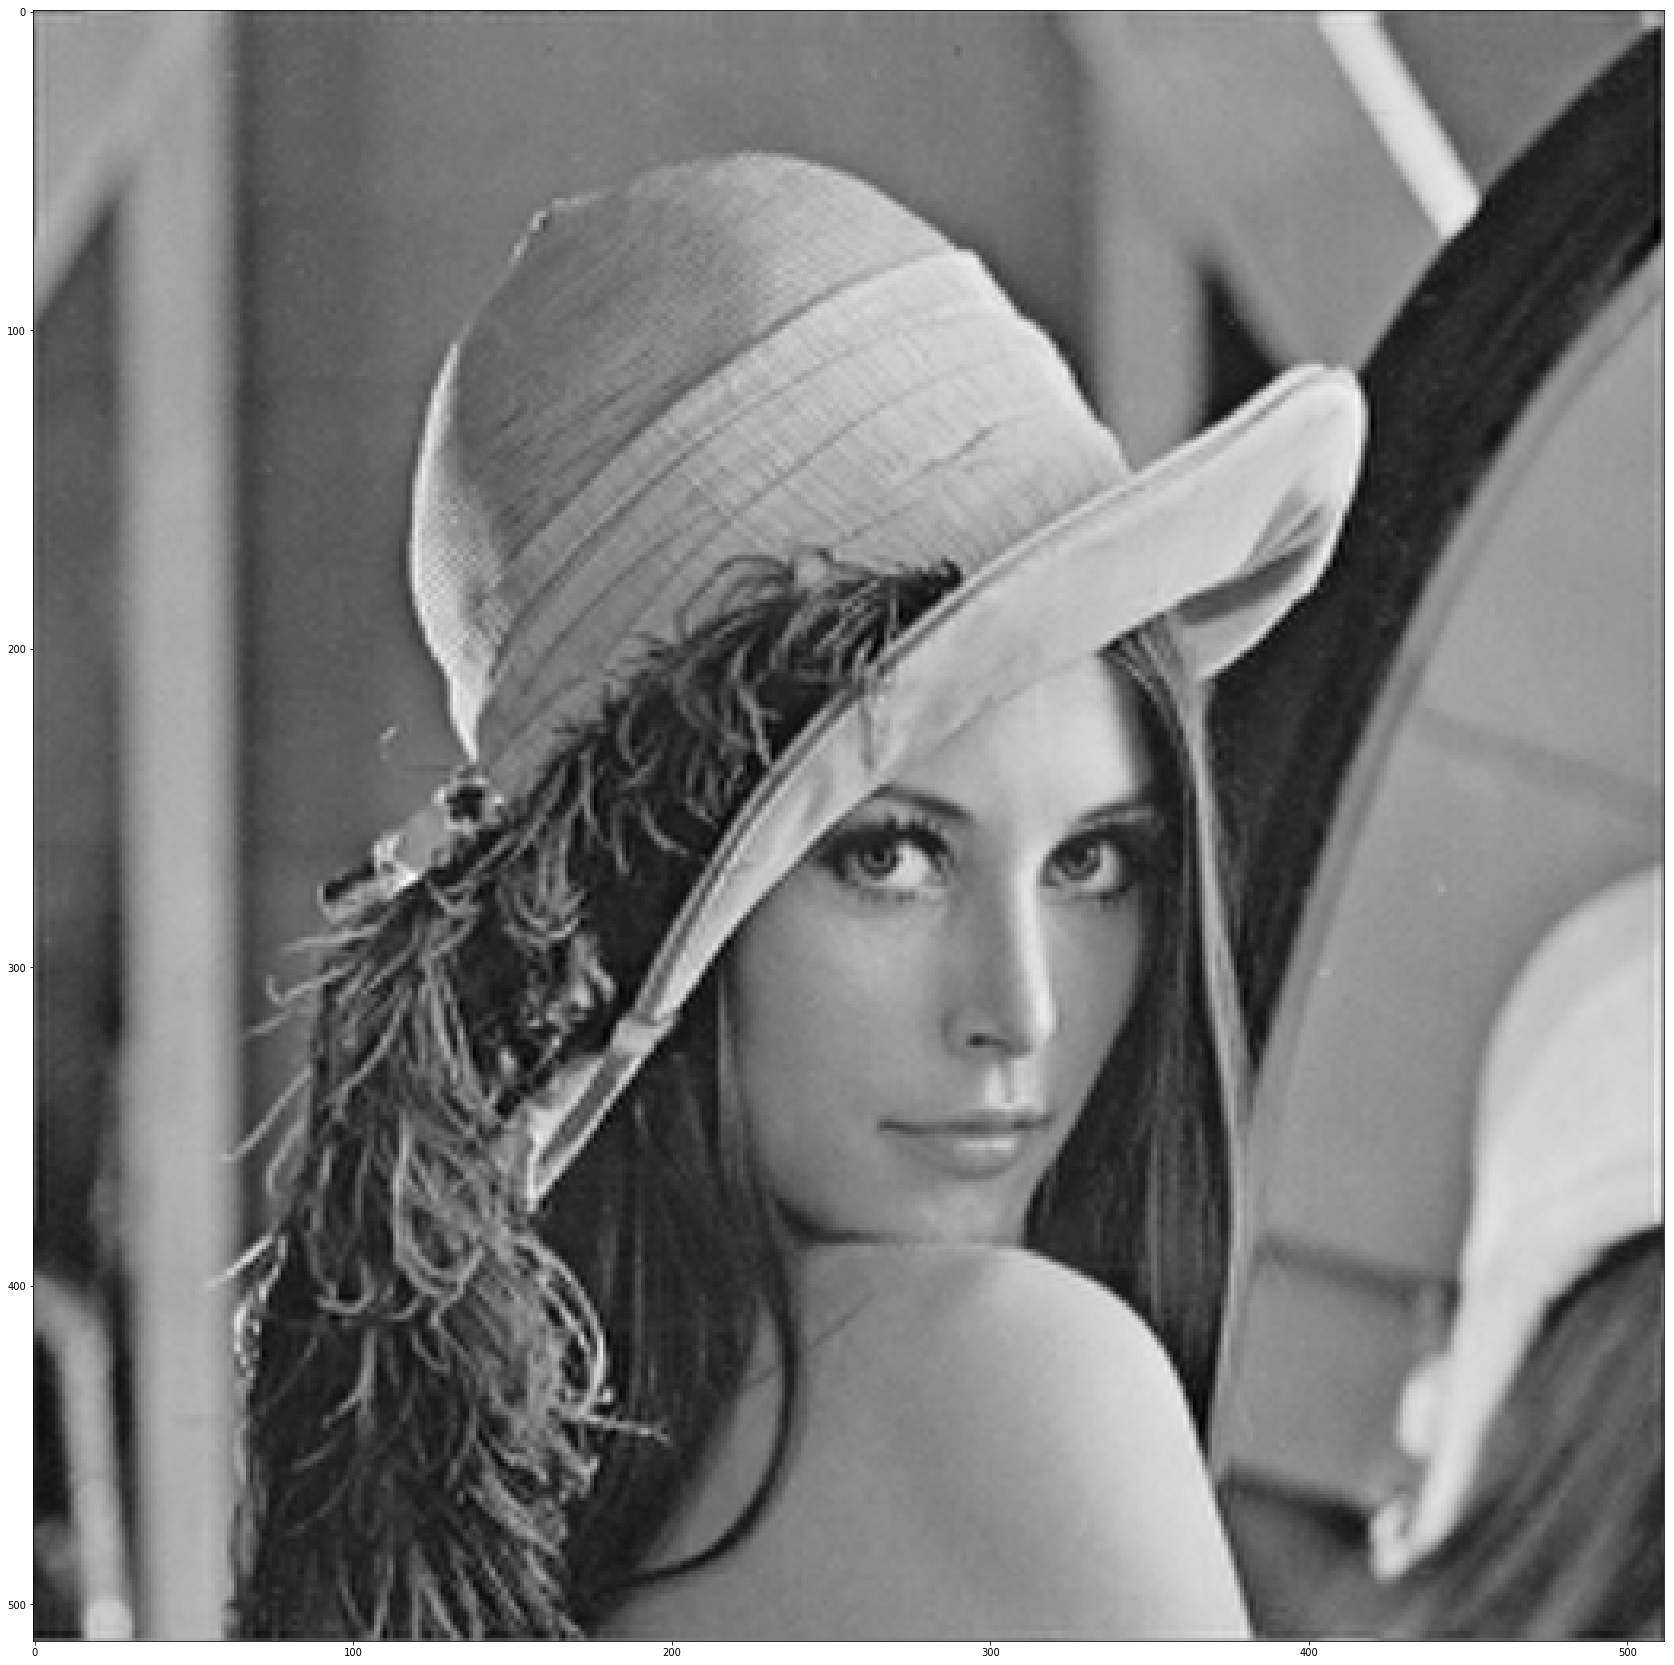

In [9]:
zero = np.zeros((L.shape[0], L.shape[1]))
L_big = pywt.idwt2((L, (zero, zero, zero)), wavelet, 'per')
show(L_big)

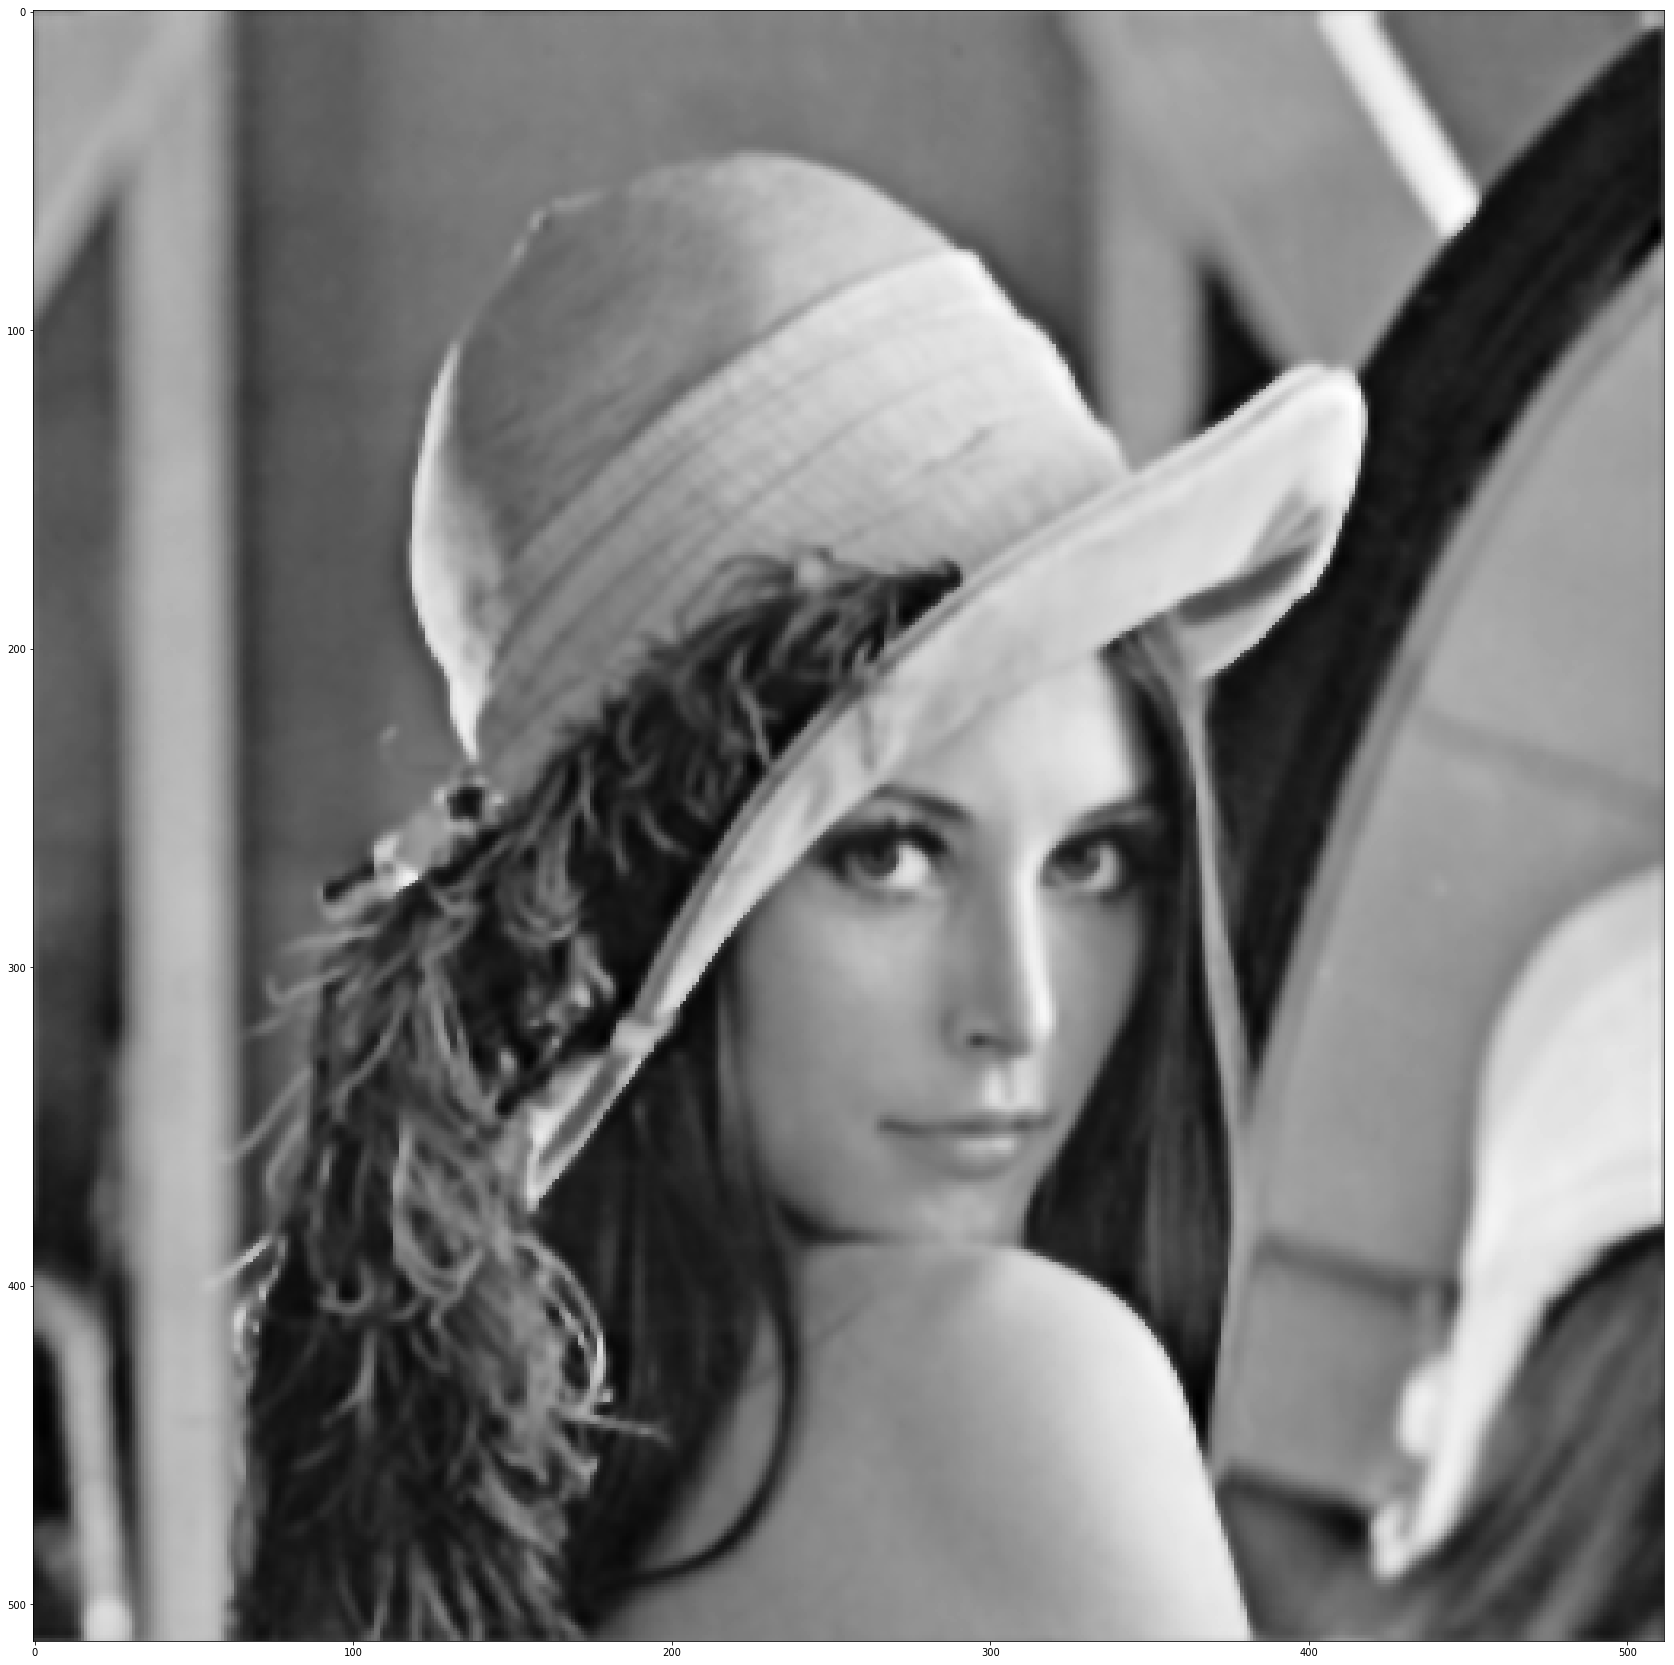

In [10]:
from medpy.filter.smoothing import anisotropic_diffusion
L_big_filtered = anisotropic_diffusion(L_big, niter=10)
show(L_big_filtered)

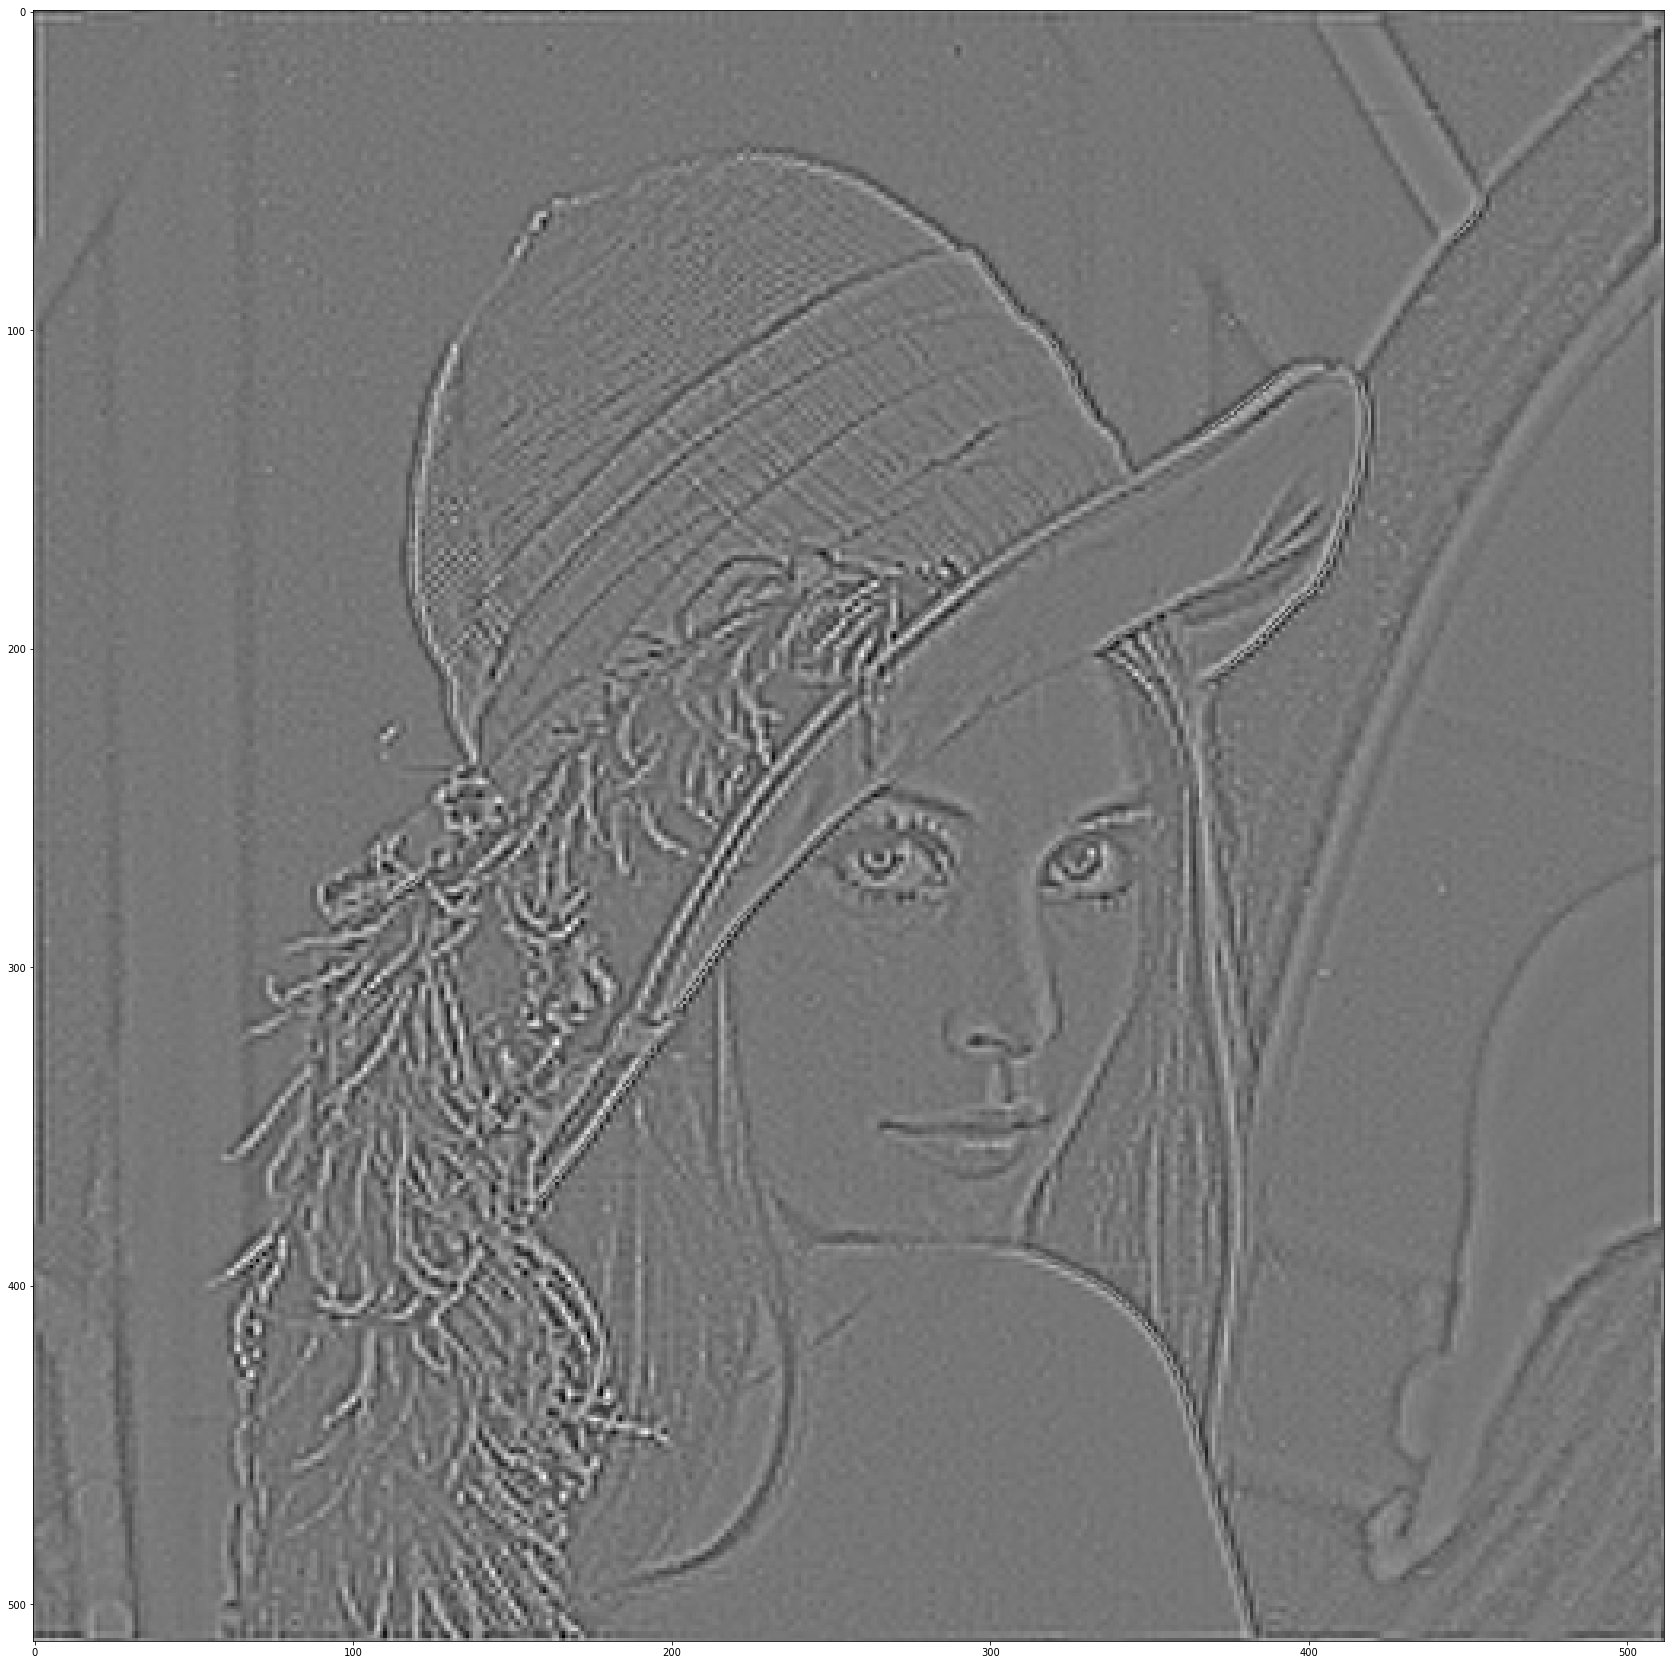

In [11]:
diff = L_big - L_big_filtered
show(diff)

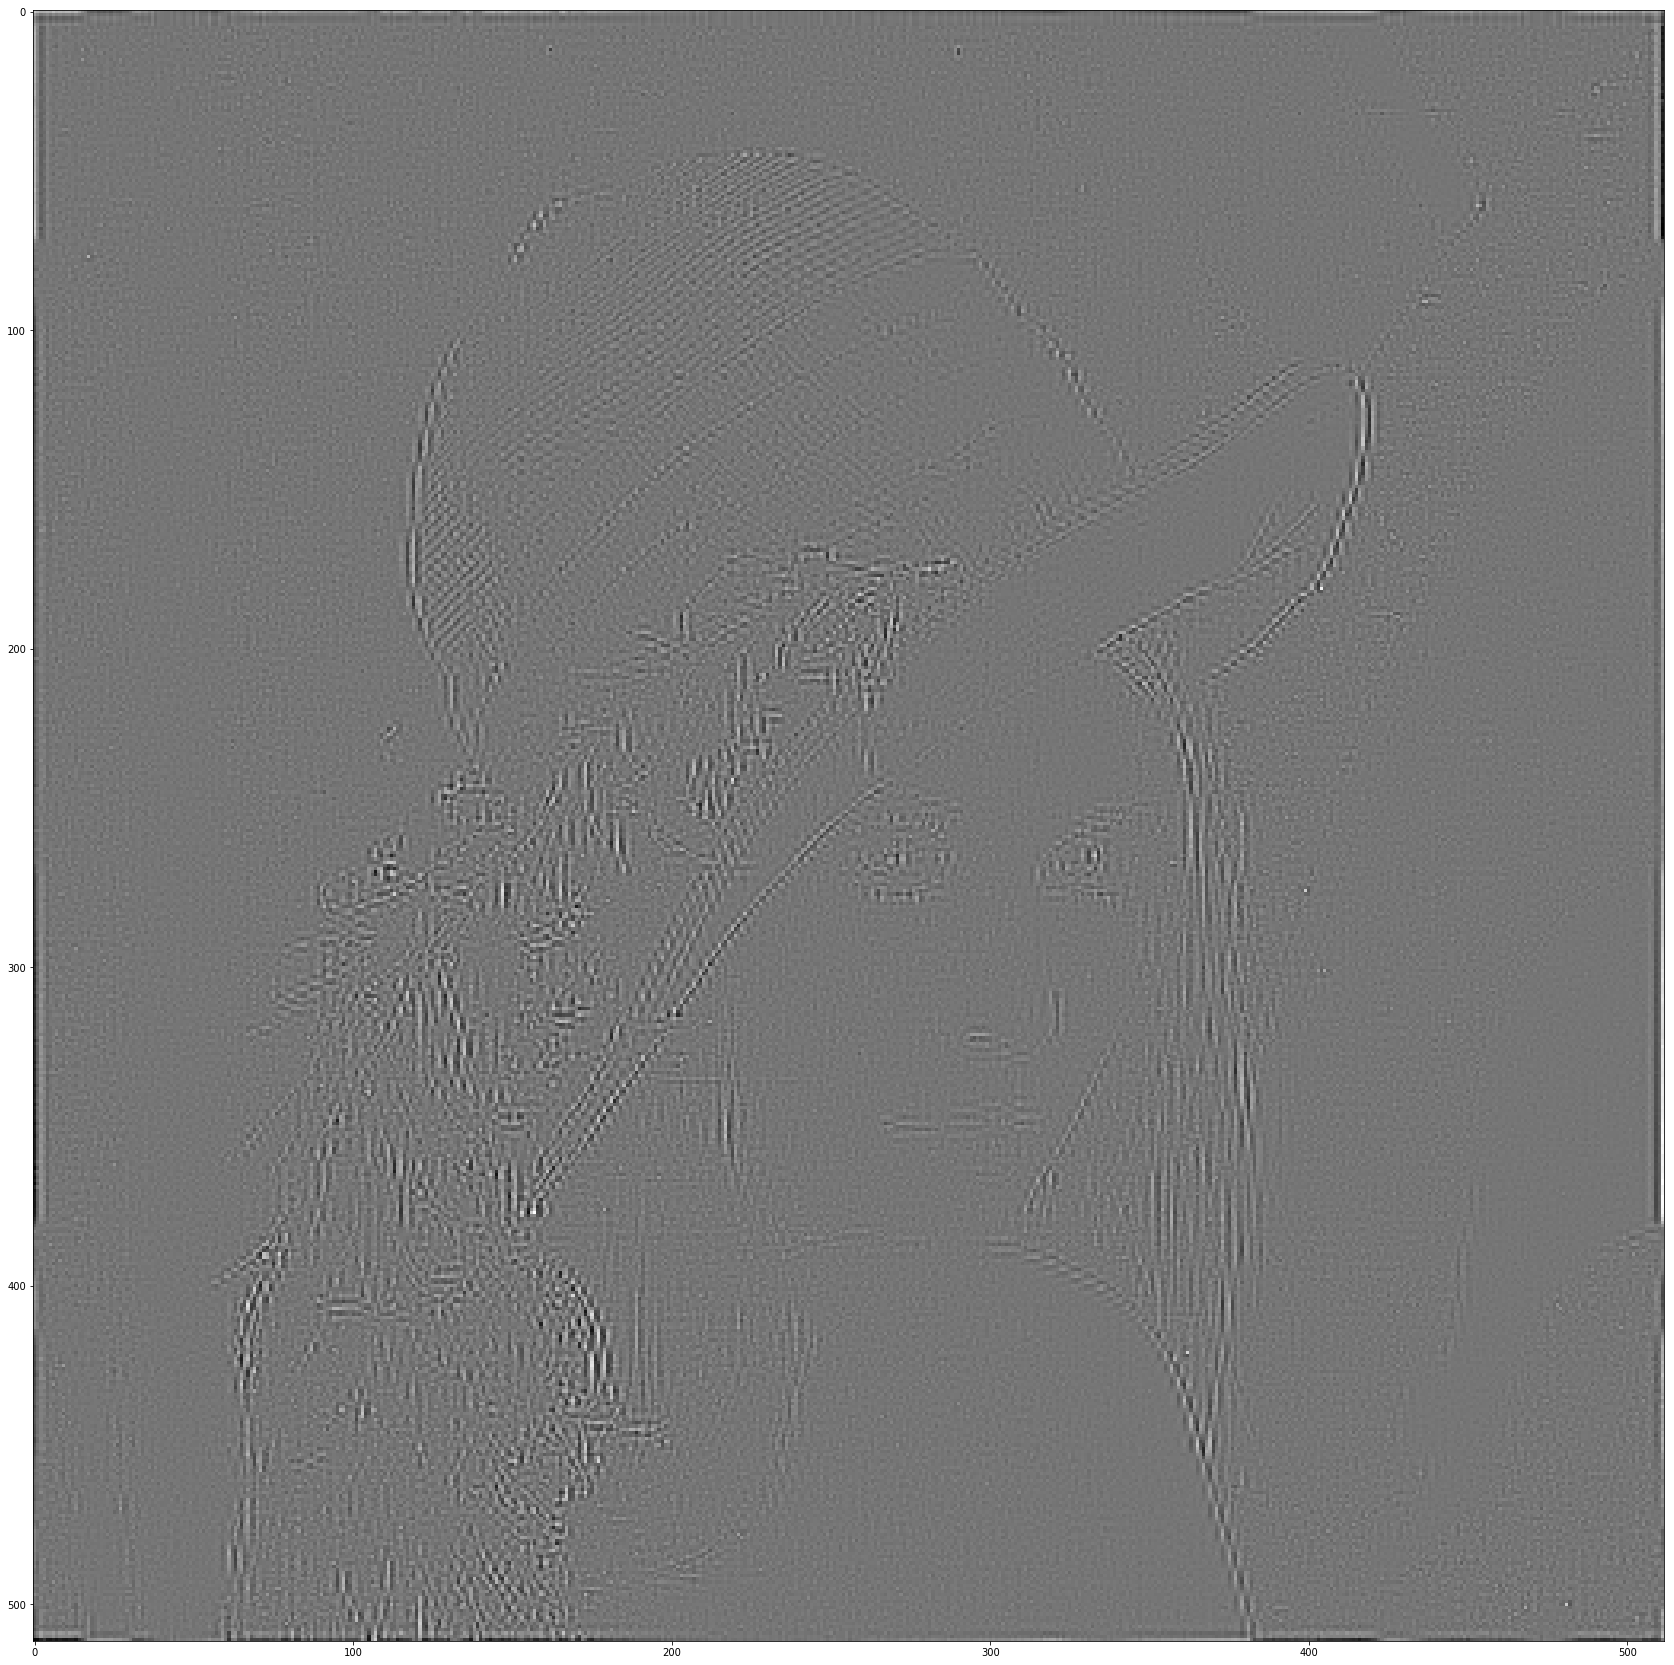

In [12]:
# Objective
L, H = pywt.dwt2(Y, wavelet, 'per')
zero = np.zeros((L.shape[0], L.shape[1]))
_H_ = pywt.idwt2((zero, H), wavelet, 'per')
show(_H_)

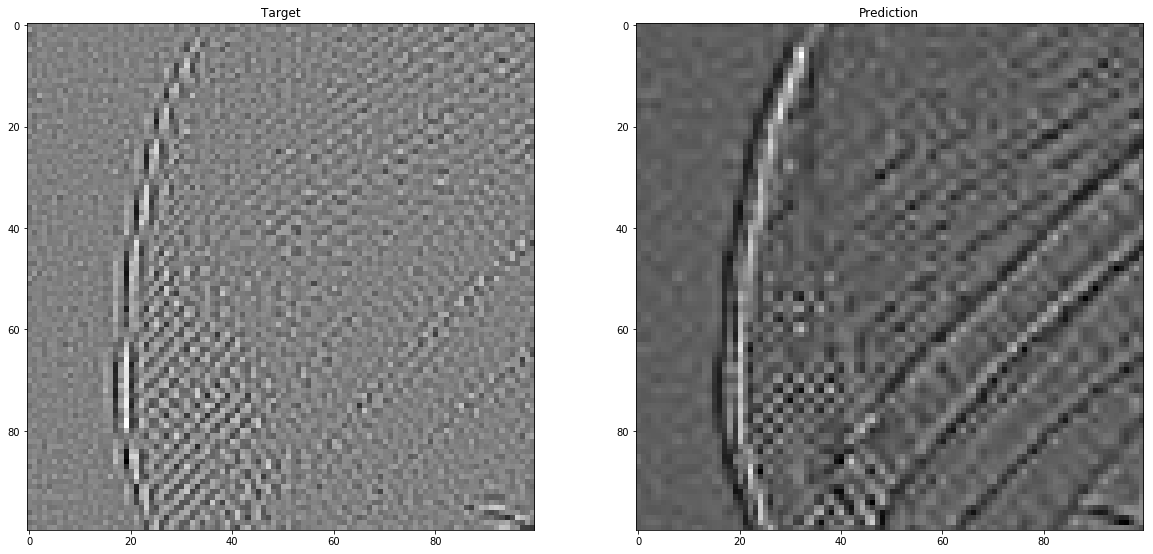

In [13]:
f, (ax0, ax1) = plt.subplots(1, 2, figsize=(20,20))
ax0.imshow(_H_[100:200, 100:200], cmap='gray', interpolation='nearest')
#ax0.imshow(image, cmap='gray')
ax0.set_title('Target')
ax1.imshow(diff[100:200, 100:200], cmap='gray', interpolation='nearest')
#ax1.imshow(filled, cmap='gray')
ax1.set_title('Prediction')
plt.show()

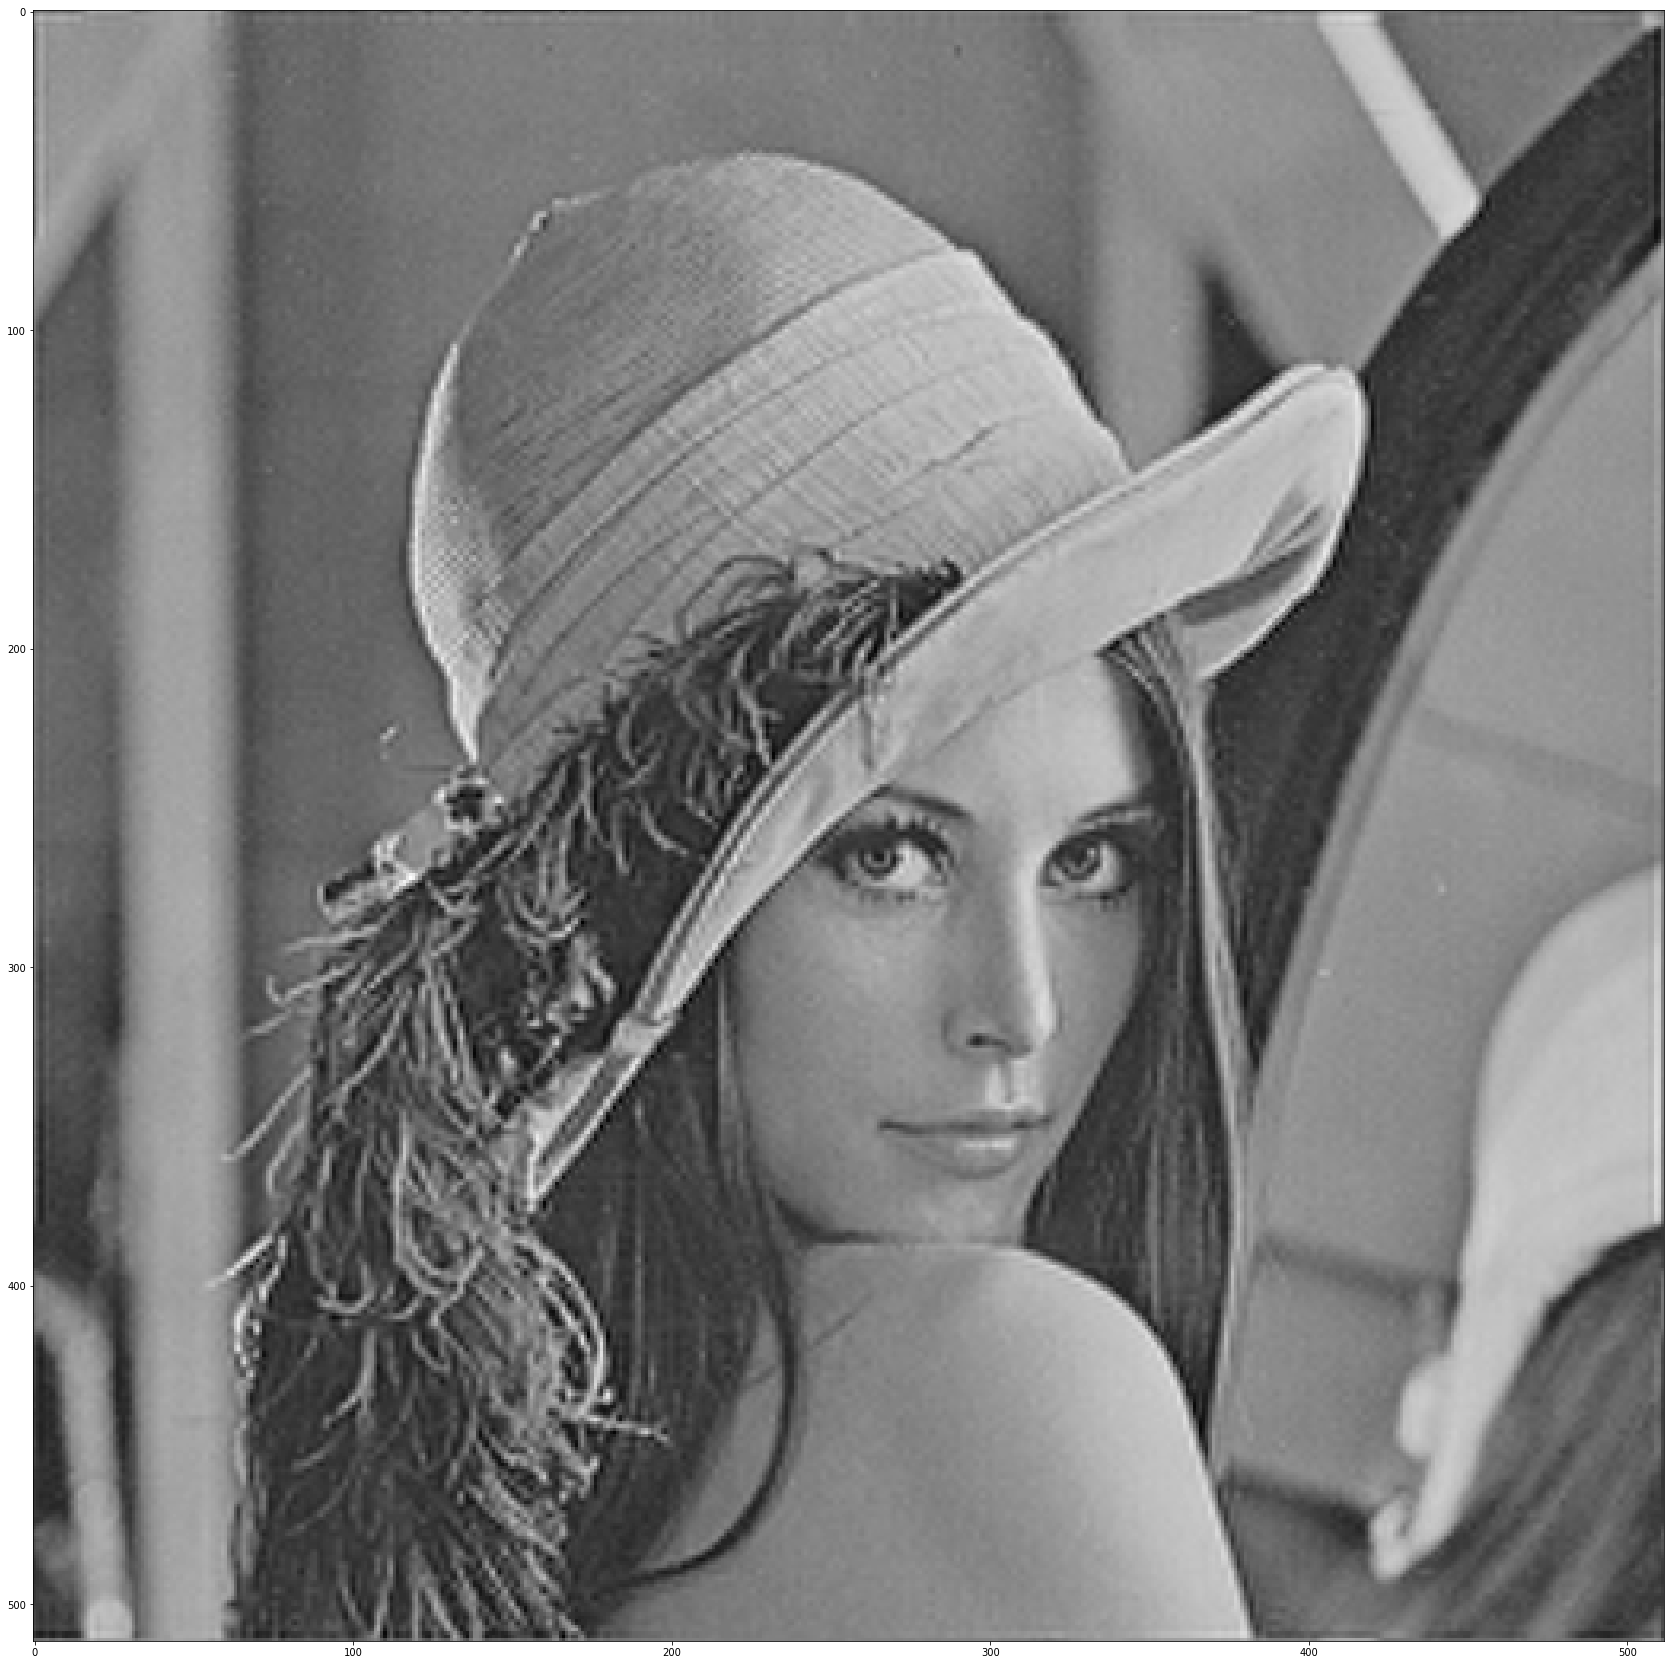

In [14]:
reconstruction_without_H = (L_big + diff)/2
show(reconstruction_without_H)

In [ ]:
tmp = L_big

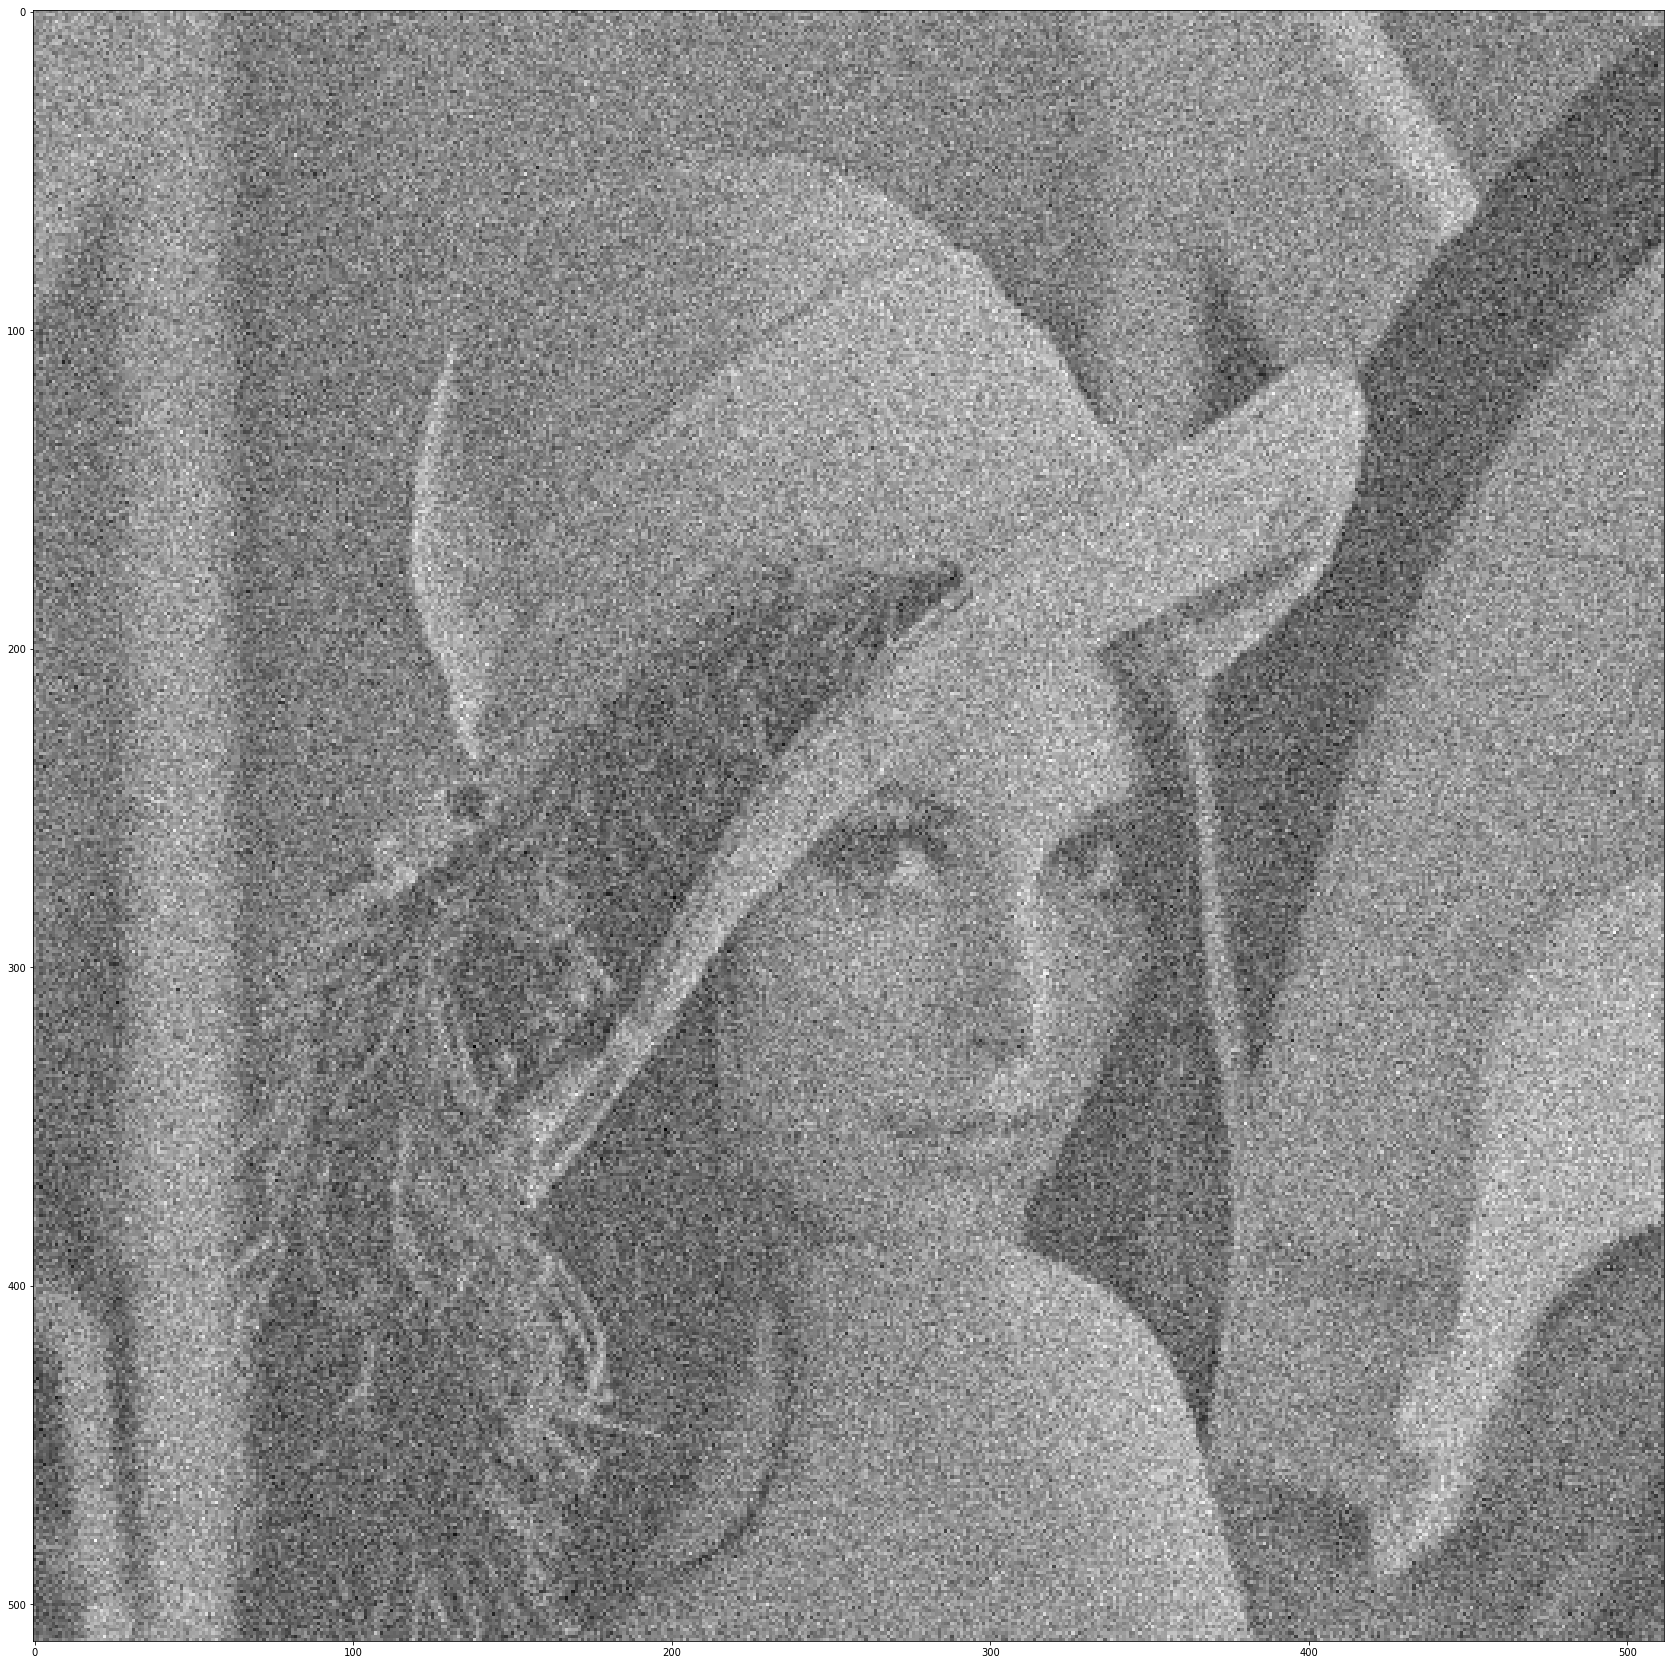

In [43]:
tmp = tmp + np.random.normal(0,1,L_big.shape)
show(tmp)

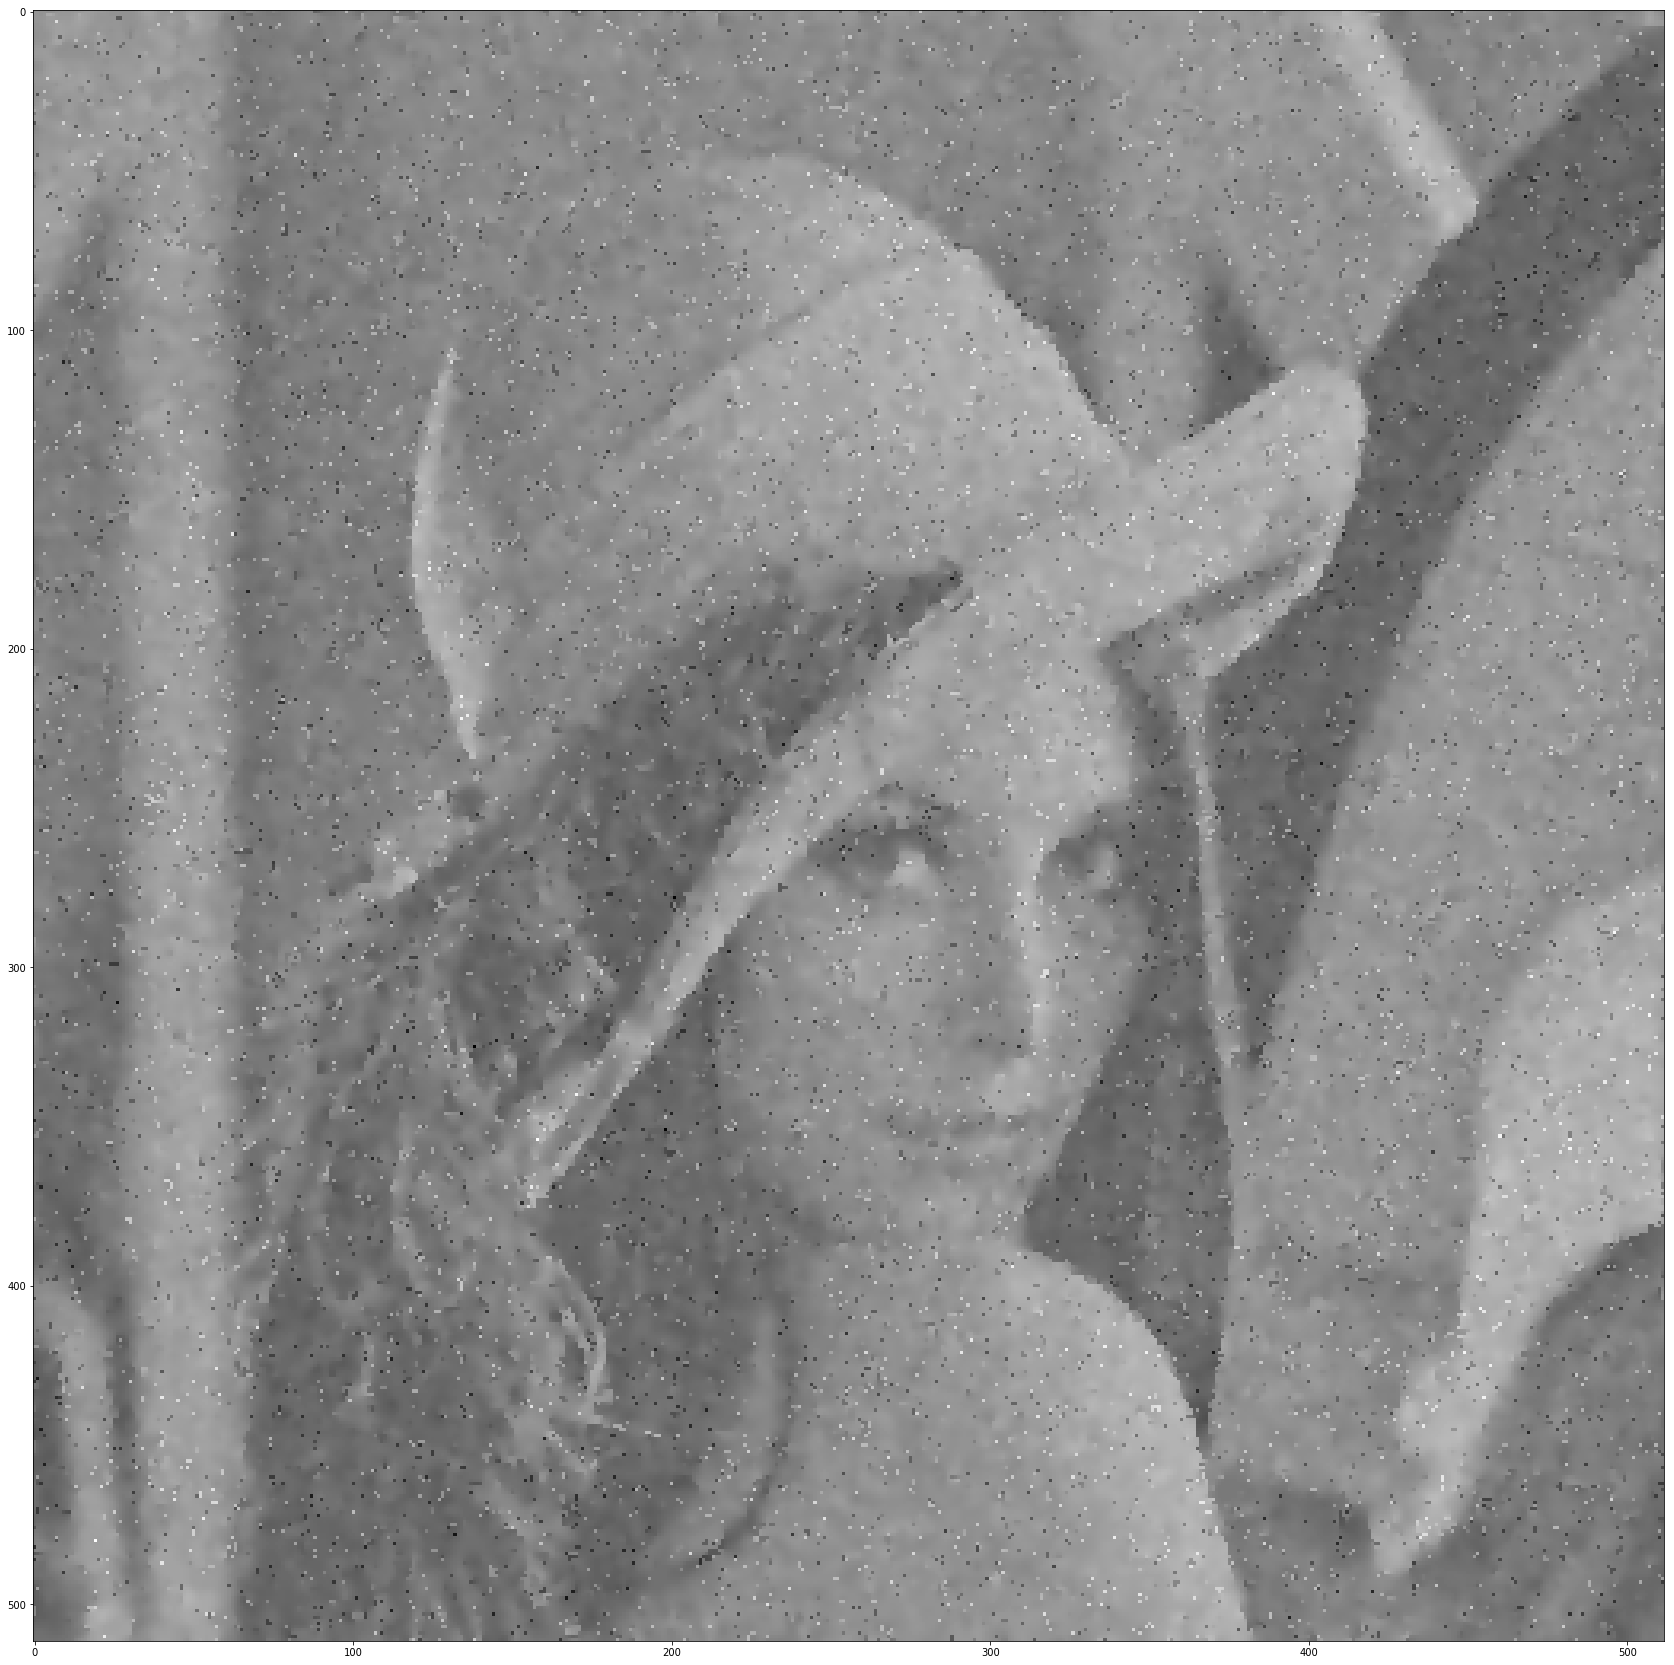

In [42]:
L_big_filtered = anisotropic_diffusion(tmp, niter=5)
show(L_big_filtered)

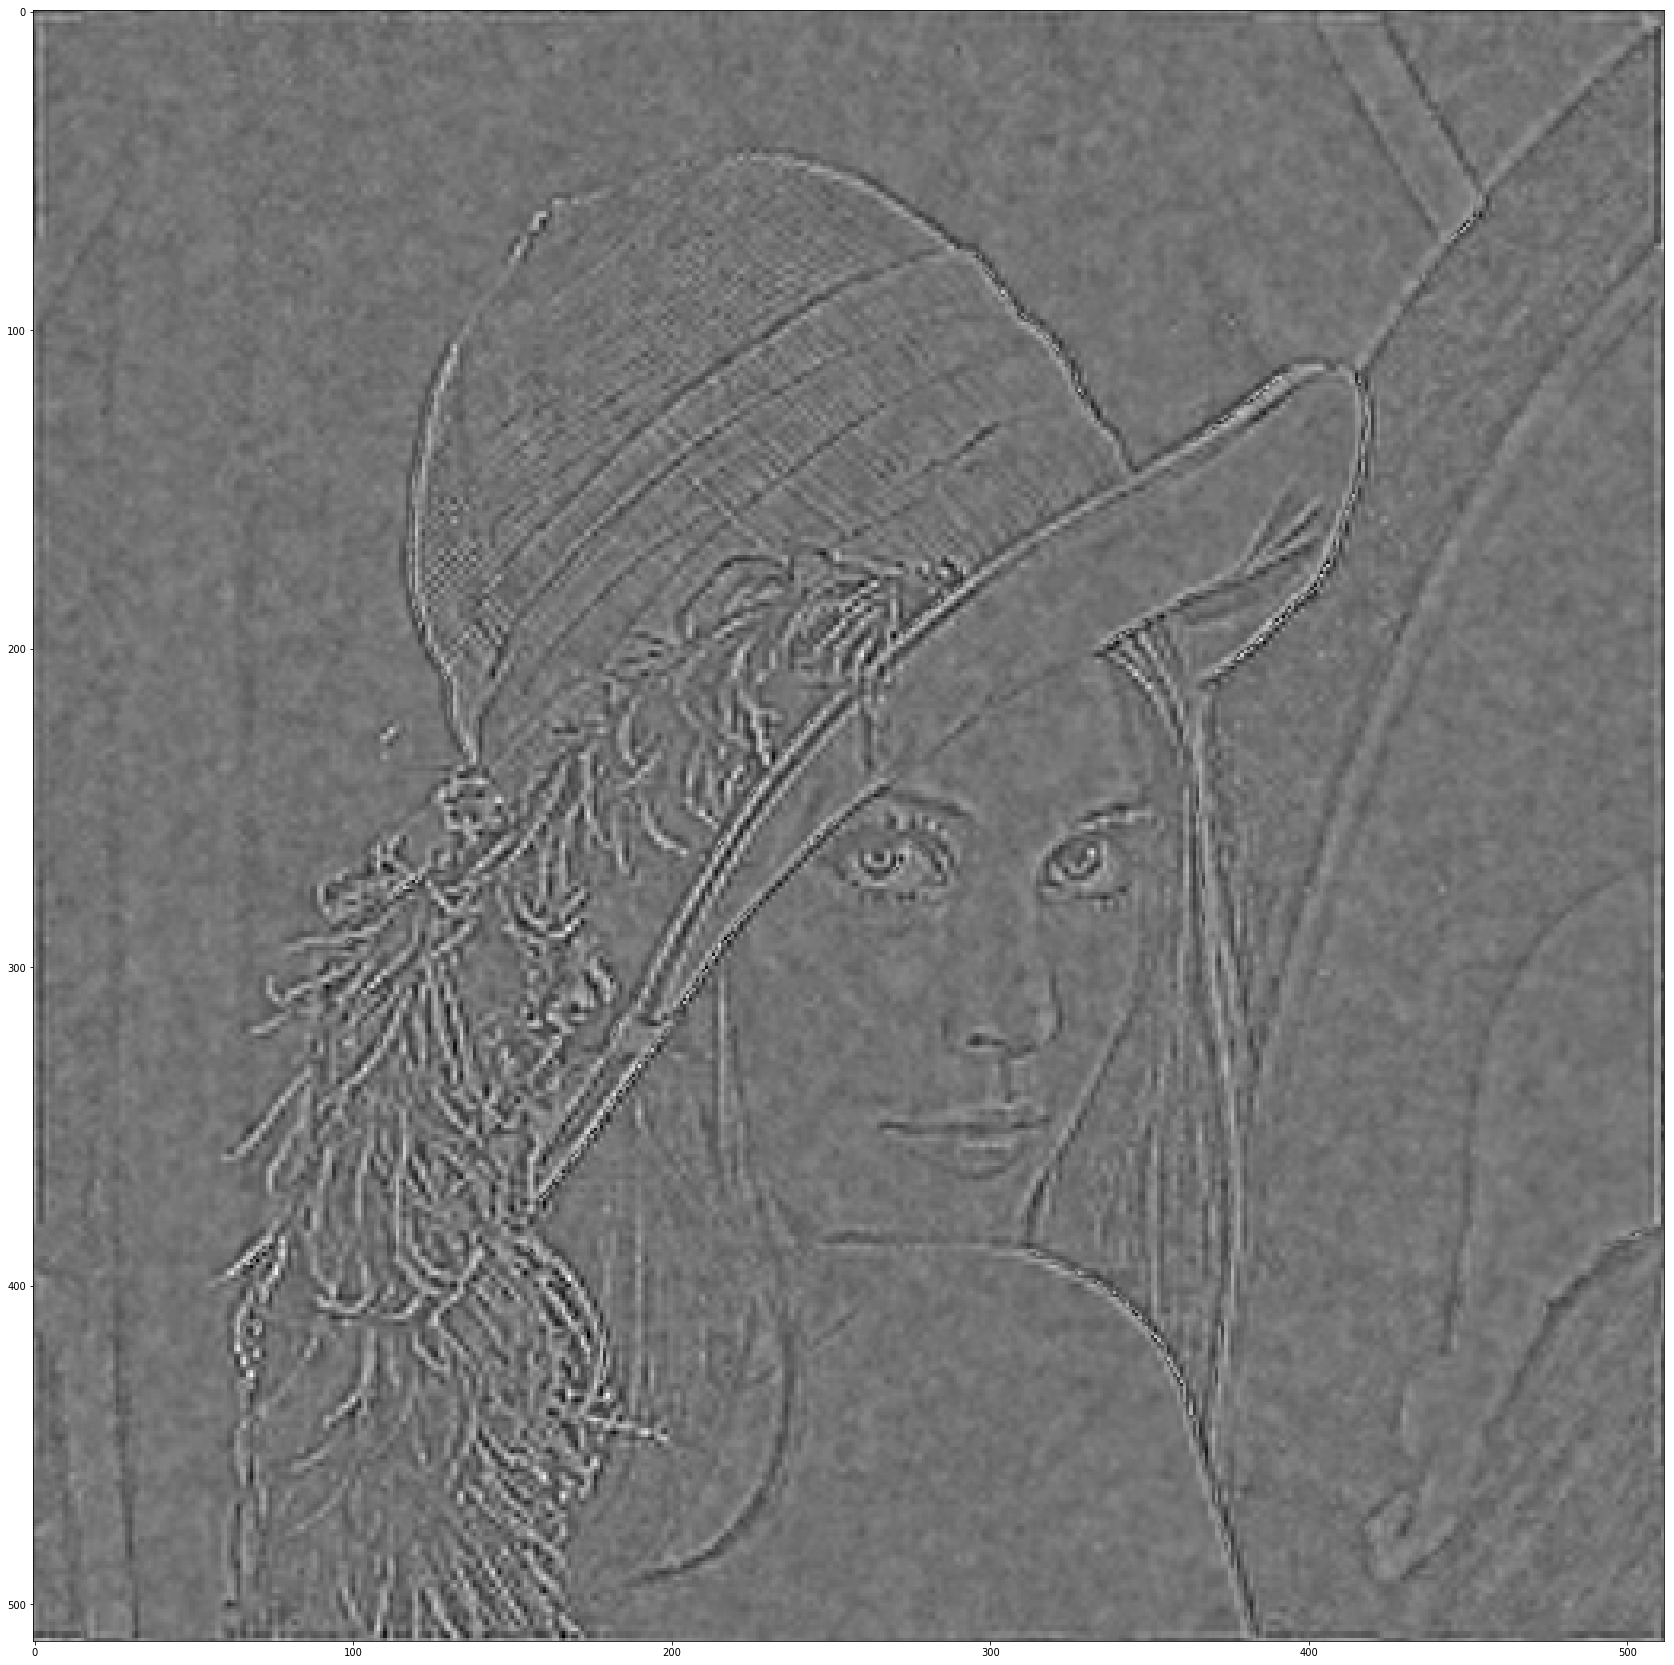

In [37]:
diff = L_big - L_big_filtered
show(diff)

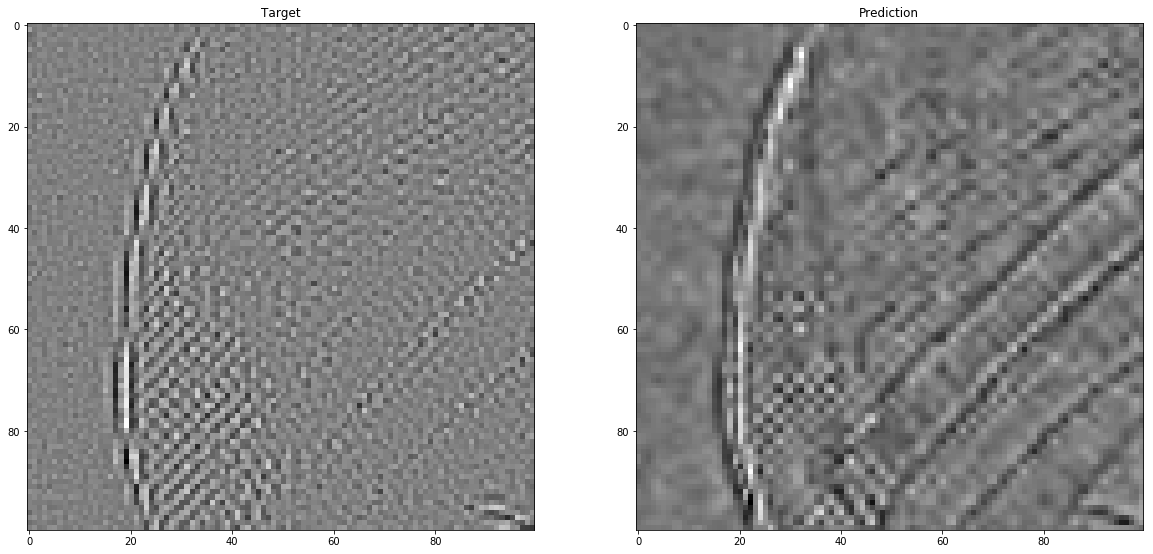

In [38]:
f, (ax0, ax1) = plt.subplots(1, 2, figsize=(20,20))
ax0.imshow(_H_[100:200, 100:200], cmap='gray', interpolation='nearest')
#ax0.imshow(image, cmap='gray')
ax0.set_title('Target')
ax1.imshow(diff[100:200, 100:200], cmap='gray', interpolation='nearest')
#ax1.imshow(filled, cmap='gray')
ax1.set_title('Prediction')
plt.show()

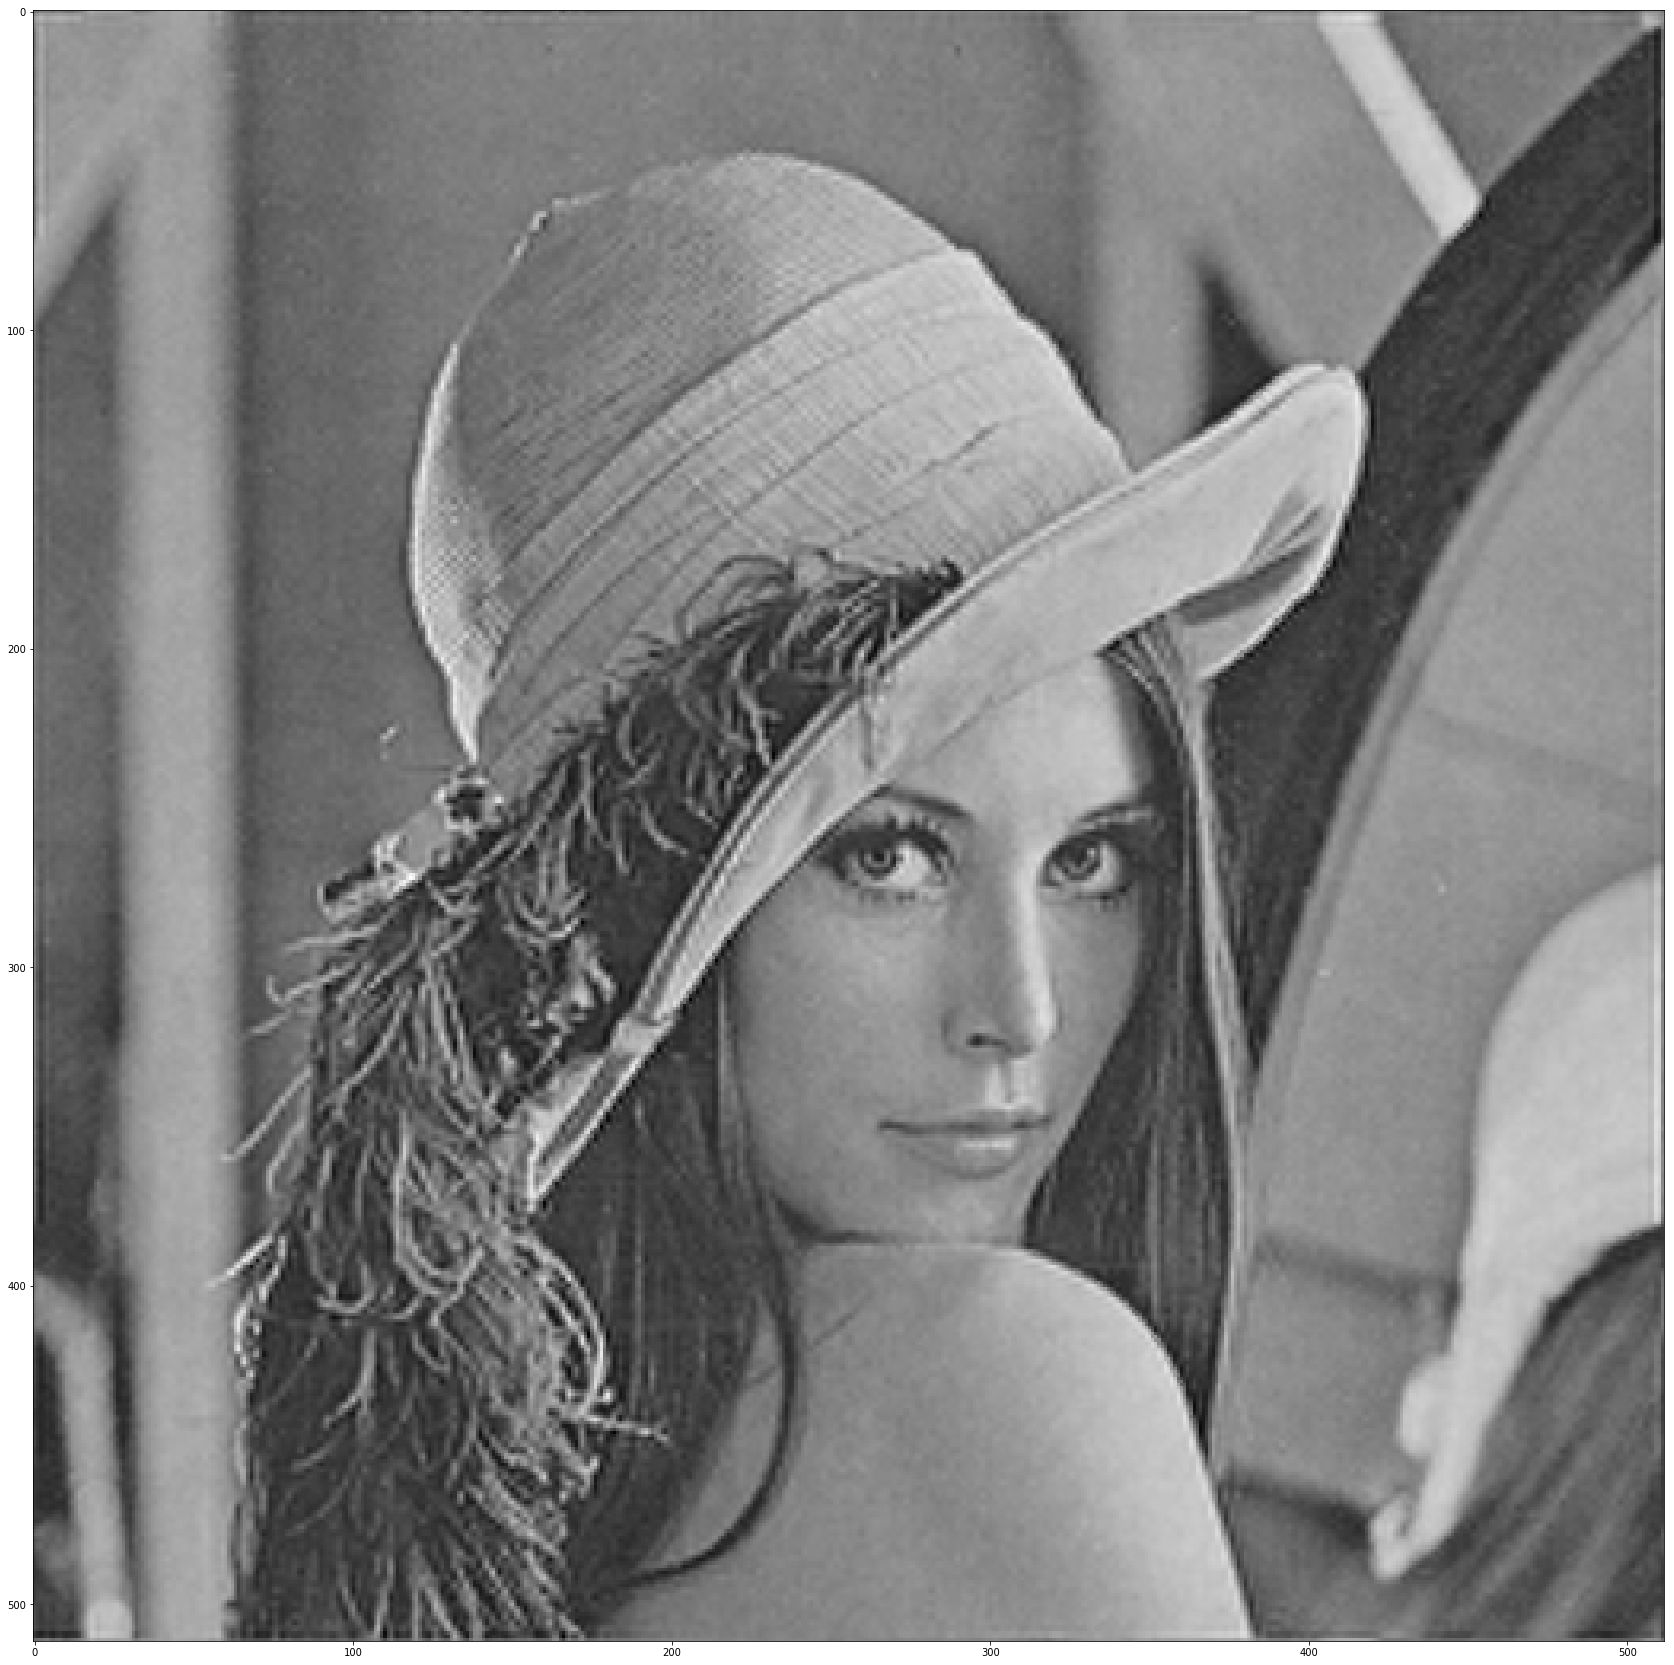

In [39]:
reconstruction_without_H = (L_big + diff)/2
show(reconstruction_without_H)